Working With Titanic Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
input_file = 'C:/Users/deanc/Documents/Datasets/Titanic/train.csv'
df_titanic = pd.read_csv(input_file)

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Set index
df_titanic.set_index('PassengerId', inplace=True)

In [6]:
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


[ 68. 178. 233. 134.  68.  26.   7.]
[ 0.42       11.78857143 23.15714286 34.52571429 45.89428571 57.26285714
 68.63142857 80.        ]
Rectangle(xy=(0.988429, 0), width=10.2317, height=68, angle=0)


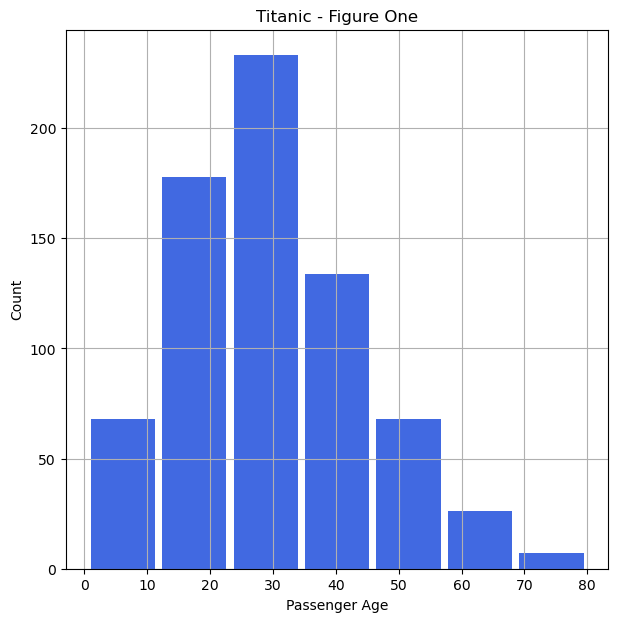

In [7]:
%matplotlib inline
figure1, ax = plt.subplots(figsize=(7,7))

ax.grid(True)
ax.set_title('Titanic - Figure One')
ax.set_xlabel('Passenger Age')
ax.set_ylabel('Count')

n,bins,patches = ax.hist(df_titanic['Age'], histtype='bar',
                         color='#4169E1', align='mid',
                         rwidth=0.90, bins=7)
#bins are equal to the number of bars
#rwidth is equal to the width between each bar
#hisstype refers to the standard type of histogram

print(n)
print(bins)
print(patches[0])

'\nThe general idea is to set the number of bins equal to the square root of the number of values at the starting point, \nthen increase as needed.\nFreedman/Diaconis Rule - Set the bin width equal 2*IQR/(number of oberservations)\n'

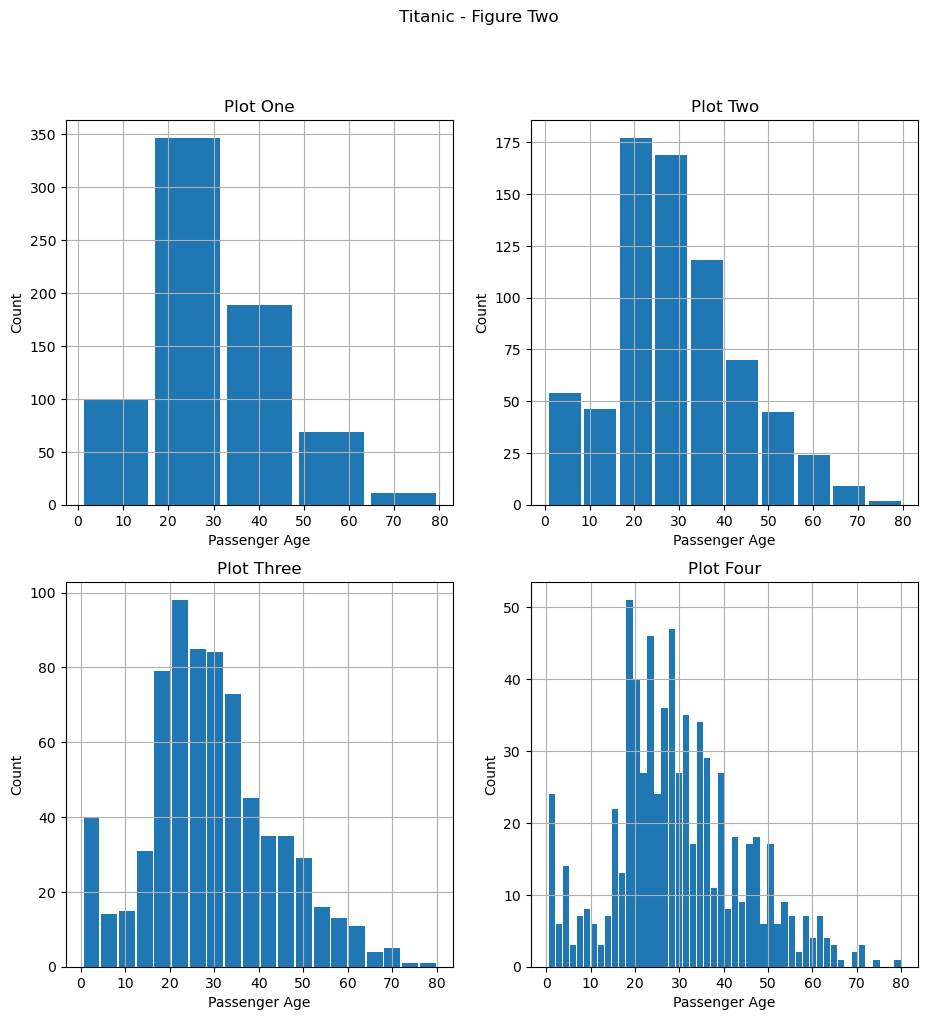

In [8]:
figure2, ax = plt.subplots(2,2, figsize=(11,11))
figure2.suptitle('Titanic - Figure Two')

ax[0,0].set_title('Plot One')
ax[0,0].grid(True)
ax[0,0].set_xlabel('Passenger Age')
ax[0,0].set_ylabel('Count')
a,b,c = ax[0,0].hist(df_titanic['Age'], histtype='bar',
                     rwidth=0.9, bins=5)

ax[0,1].set_title('Plot Two')
ax[0,1].grid(True)
ax[0,1].set_xlabel('Passenger Age')
ax[0,1].set_ylabel('Count')
d,e,f = ax[0,1].hist(df_titanic['Age'], histtype='bar',
                     rwidth=0.9, bins=10)

ax[1,0].set_title('Plot Three')
ax[1,0].grid(True)
ax[1,0].set_xlabel('Passenger Age')
ax[1,0].set_ylabel('Count')
g,h,i = ax[1,0].hist(df_titanic['Age'], histtype='bar',
                     rwidth=0.9, bins=20)

ax[1,1].set_title('Plot Four')
ax[1,1].grid(True)
ax[1,1].set_xlabel('Passenger Age')
ax[1,1].set_ylabel('Count')
j,k,l = ax[1,1].hist(df_titanic['Age'], histtype='bar',
                     rwidth=0.9, bins=50)

"""
The general idea is to set the number of bins equal to the square root of the number of values at the starting point, 
then increase as needed.
Freedman/Diaconis Rule - Set the bin width equal 2*IQR/(number of oberservations)
"""

<Axes: ylabel='Frequency'>

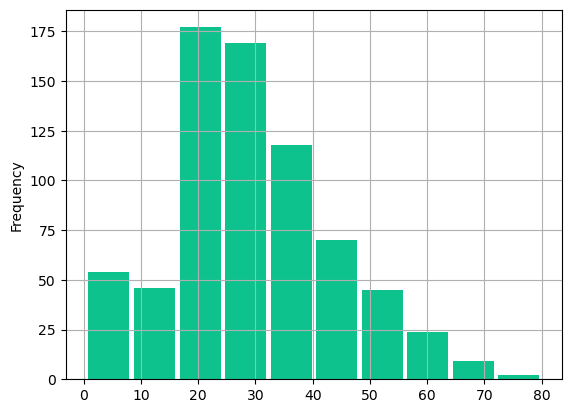

In [9]:
#We can create a histogram using pandas as well
df_titanic['Age'].plot.hist(color='#0dc28d', align='mid',
                            rwidth=0.9, grid=True)


Now, let's create some bar charts. Commonly used when dealing with categorical variables. 

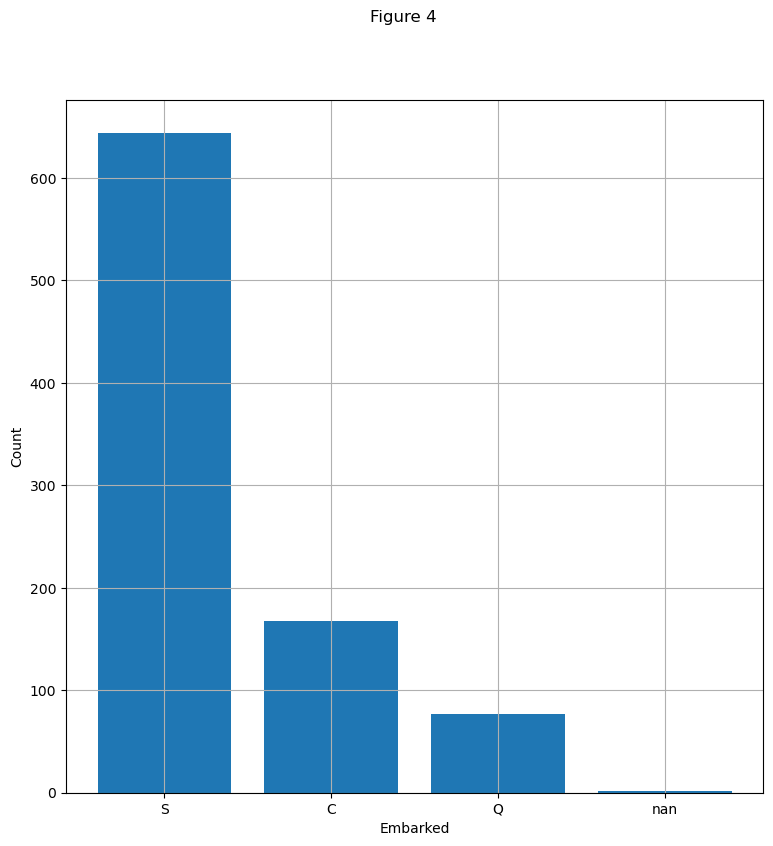

In [10]:
#Use plyplot functions to create a bar graph of the Embarked Column
figure4, ax = plt.subplots(figsize=(9,9))
ax.set_xlabel('Embarked')
ax.set_ylabel('Count')
ax.grid(True)
figure4.suptitle("Figure 4")

values = df_titanic['Embarked'].unique()
counts = df_titanic['Embarked'].value_counts(dropna=False)
x_positions = np.arange(len(values))

ax.bar(x_positions, counts, align='center')
ax.set_xticks(x_positions,values)

<Axes: xlabel='Embarked', ylabel='Count'>

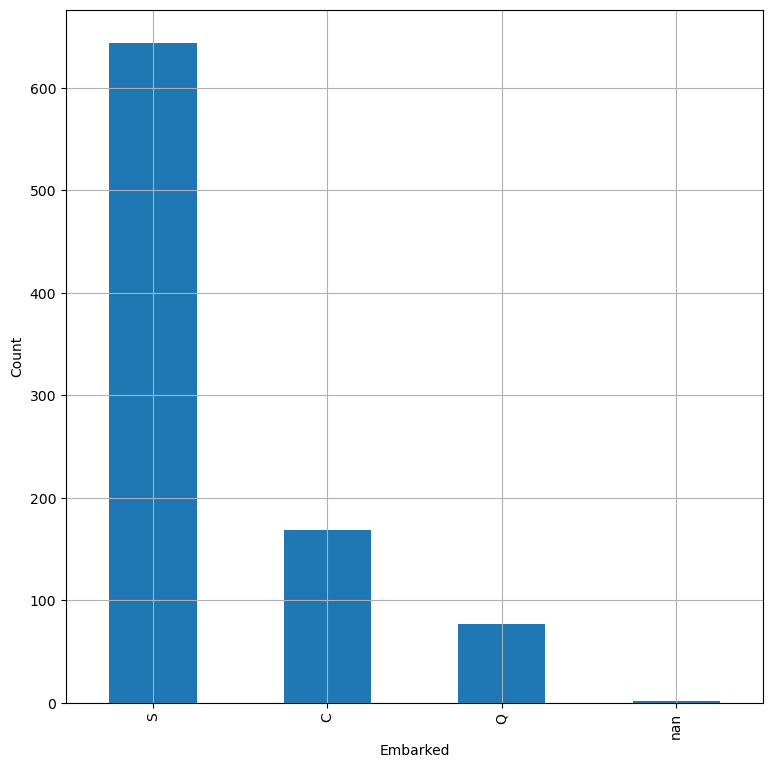

In [11]:
#Plotting using Pandas
fig = plt.figure(figsize=(9,9))
plt.xlabel("Embarked")
plt.ylabel('Count')

df_titanic['Embarked'].value_counts(dropna=False).plot.bar(grid=True)

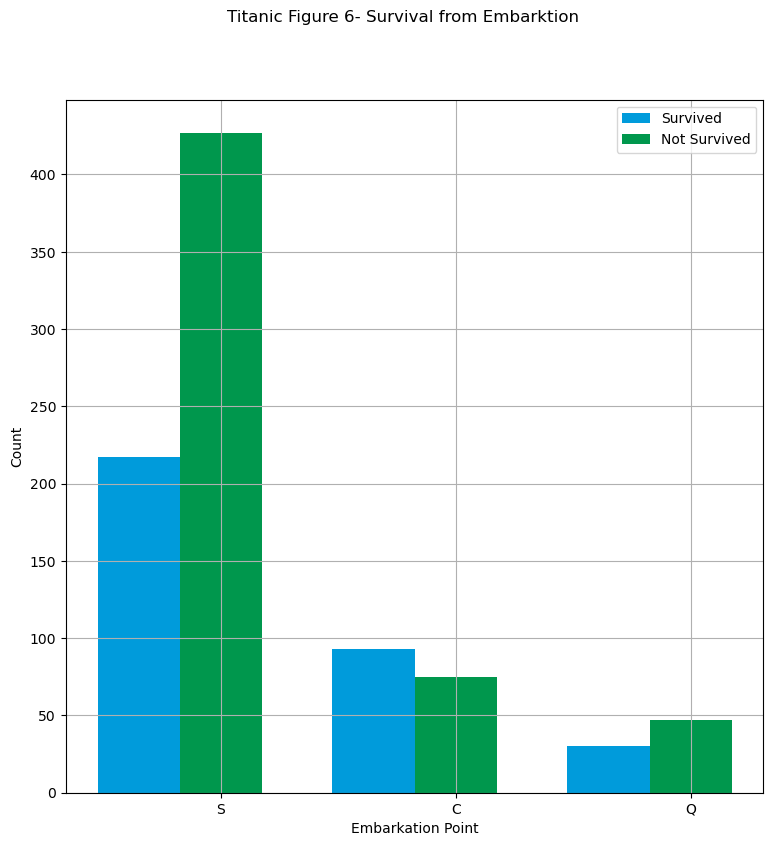

In [12]:
df_survived = df_titanic[df_titanic['Survived']==1]
df_not_survived = df_titanic[df_titanic['Survived']==0]

values = df_titanic['Embarked'].dropna().unique()
embarked_counts_survived = df_survived['Embarked'].value_counts(dropna=True)
embarked_counts_not_survived = df_not_survived['Embarked'].value_counts(dropna=True)

x_positions = np.arange(len(values))

figure5, ax = plt.subplots(figsize=(9,9))
figure5.suptitle('Titanic Figure 6- Survival from Embarktion')
ax.set_xlabel('Embarkation Point')
ax.set_ylabel('Count')
ax.grid(True)

bar_width = 0.35

ax.bar(x_positions, embarked_counts_survived, bar_width, color='#009bdb', label='Survived')
ax.bar(x_positions+bar_width, embarked_counts_not_survived, bar_width, color='#00974d', label='Not Survived')

ax.set_xticks(x_positions + bar_width, values)
plt.legend()


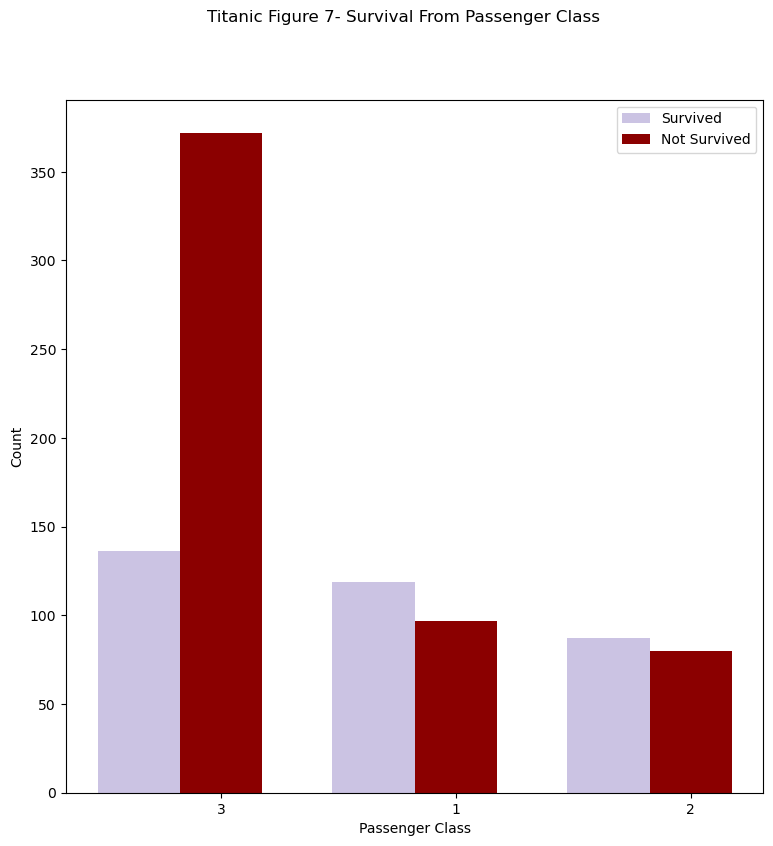

In [13]:
df_titanic_survived = df_titanic[df_titanic['Survived']==1]
df_titanic_not_survived = df_titanic[df_titanic['Survived']==0]

values = df_titanic['Pclass'].dropna().unique()
survived_Pclass = df_titanic_survived['Pclass'].value_counts(dropna=True)
not_survived_Pclass = df_titanic_not_survived['Pclass'].value_counts(dropna=True)

x_positions = np.arange(len(values))

figure6, ax = plt.subplots(figsize=(9,9))
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Count')
figure6.suptitle('Titanic Figure 7- Survival From Passenger Class')

bar_width = 0.35

ax.bar(x_positions, survived_Pclass, bar_width, color='#CBC3E3',label='Survived')
ax.bar(x_positions+bar_width, not_survived_Pclass, bar_width, color='#8B0000', label='Not Survived')

ax.set_xticks(x_positions+bar_width,values)
plt.legend()

<Axes: xlabel='Embarked', ylabel='Count'>

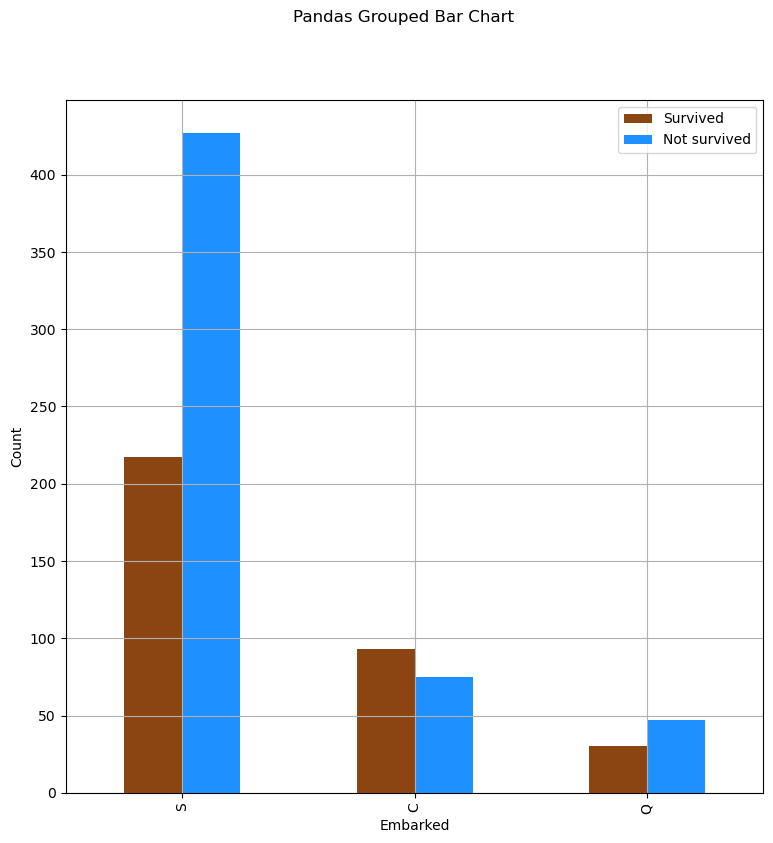

In [41]:
#Creating a Grouped Bar Chart Using Pandas
df_survived = df_titanic[df_titanic['Survived']==1]
df_not_survived = df_titanic[df_titanic['Survived']==0]

values = df_titanic['Embarked'].dropna().unique()
embarked_surived = df_survived['Embarked'].value_counts(dropna=True)
embarked_not_survived = df_not_survived['Embarked'].value_counts(dropna=True)

embarked_counts_survived.name = 'Survived'
embarked_counts_not_survived.name = 'Not survived'
df = pd.concat([embarked_counts_survived, embarked_counts_not_survived], axis=1)

fig7, axes = plt.subplots(figsize=(9,9))
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
fig7.suptitle('Pandas Grouped Bar Chart')

df.plot.bar(grid=True, ax=axes, color=['#8B4513','#1E90FF'])

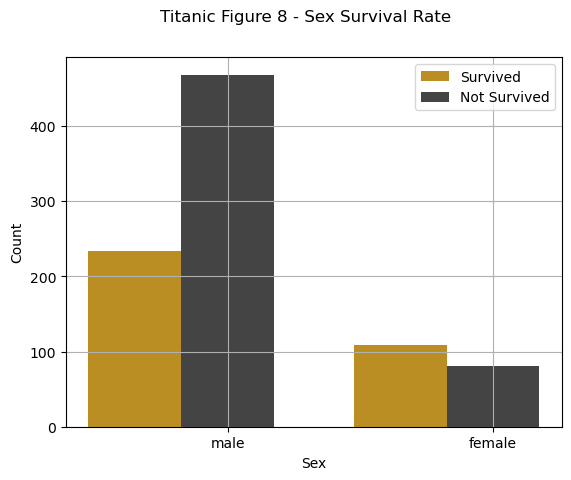

In [14]:
df_survived = df_titanic[df_titanic['Survived']==1]
df_not_survived = df_titanic[df_titanic['Survived']==0]

values = df_titanic['Sex'].dropna().unique()
sex_survived = df_survived['Sex'].value_counts(dropna=True)
sex_not_survived = df_not_survived['Sex'].value_counts(dropna=True)

x_positions = np.arange(len(values))

bar_width = 0.35

figure8, ax = plt.subplots()
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.grid()
figure8.suptitle('Titanic Figure 8 - Sex Survival Rate')

ax.bar(x_positions, sex_survived, bar_width, color='#BA8E23', label="Survived")
ax.bar(x_positions + bar_width, sex_not_survived, bar_width, color='#444444', label="Not Survived")
ax.set_xticks(x_positions + bar_width, values)
plt.legend()

In [15]:
def greet(name):
    return f"Hello {name}"
    

In [16]:
greet("BigBreakfast")

'Hello BigBreakfast'

See if I can create a Stacked BarChart on my own without reading the book first. Stacked Bar Chart on Embark point. 

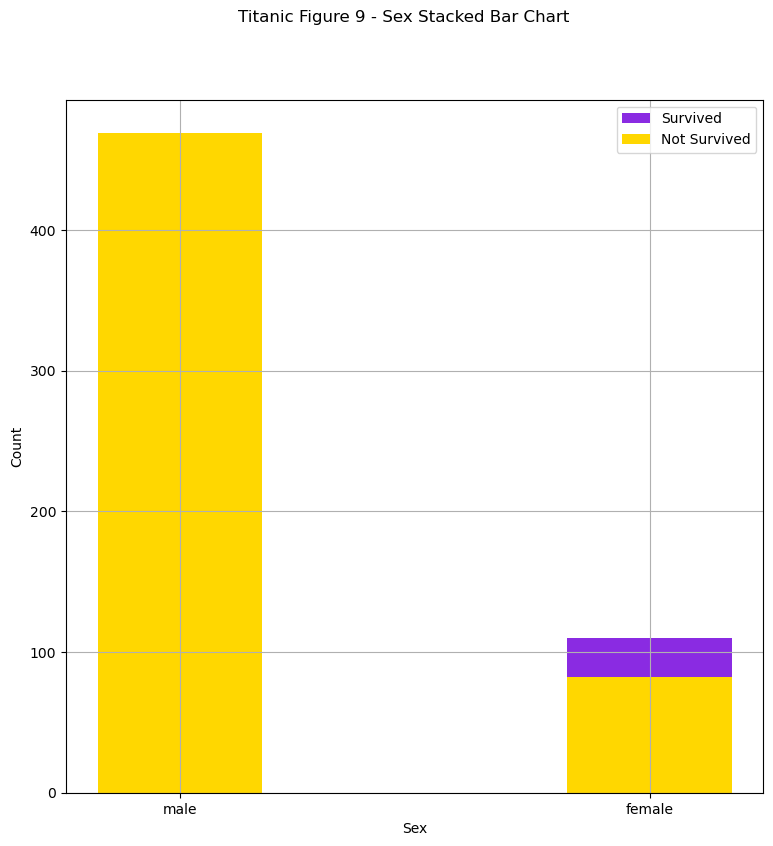

In [22]:
df_survived = df_titanic[df_titanic['Survived']==1]
df_not_survived = df_titanic[df_titanic['Survived']==0]

values = df_titanic['Sex'].dropna().unique()
sex_survived = df_survived['Sex'].value_counts(dropna=True)
sex_not_survived = df_not_survived['Sex'].value_counts(dropna=True)

x_positions = np.arange(len(values))

bar_height = 1 #Not needed
bar_width = 0.35 #Not needed

figure9, ax = plt.subplots(figsize=(9,9))
ax.grid()
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
figure9.suptitle('Titanic Figure 9 - Sex Stacked Bar Chart')

ax.bar(x_positions, sex_survived+bar_height, bar_width, color='#8A2BE2', label="Survived")
ax.bar(x_positions, sex_not_survived + bar_height,bar_width, color='#FFD700', label="Not Survived") #Use the bottom parameter here
ax.set_xticks(x_positions, values)
plt.legend()
#This is my first attempt at a stacked bar chart without reading the book first. 
#Next cell will contain code that is correct. 
#I wasn't too far off after looking back at it. 

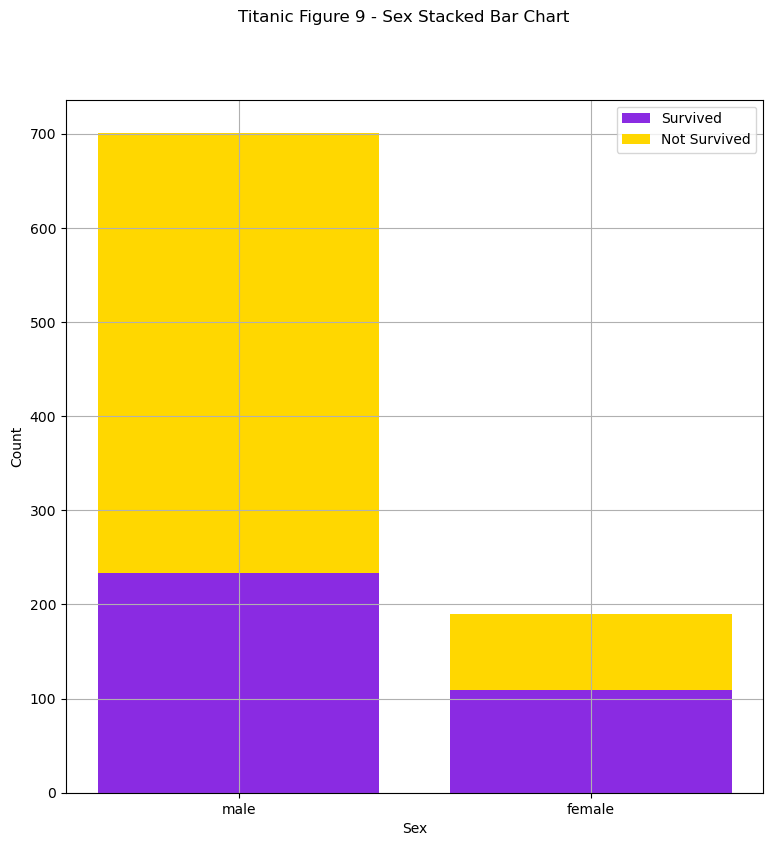

In [28]:
df_survived = df_titanic[df_titanic['Survived']==1]
df_not_survived = df_titanic[df_titanic['Survived']==0]

values = df_titanic['Sex'].dropna().unique()
sex_survived = df_survived['Sex'].value_counts(dropna=True)
sex_not_survived = df_not_survived['Sex'].value_counts(dropna=True)

x_positions = np.arange(len(values))
bar_width=0

figure9, ax = plt.subplots(figsize=(9,9))
ax.grid()
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
figure9.suptitle('Titanic Figure 9 - Sex Stacked Bar Chart')

ax.bar(x_positions, sex_survived, color='#8A2BE2', label="Survived")
ax.bar(x_positions, sex_not_survived,bottom=sex_survived, color='#FFD700', label="Not Survived")
ax.set_xticks(x_positions, values)
plt.legend()
"""
Ok, I discovered something major here. The key element here is that the dataframe with the largest count must on the height column. 
If you choose the have the dataframe with the larger count to go on the bottom then you will end up with a gap between the stacked charts.
Proof: Switch the bottom parameter to 'sex_not_survived' and create the new graph. 
"""

<Axes: xlabel='Embarked', ylabel='Count'>

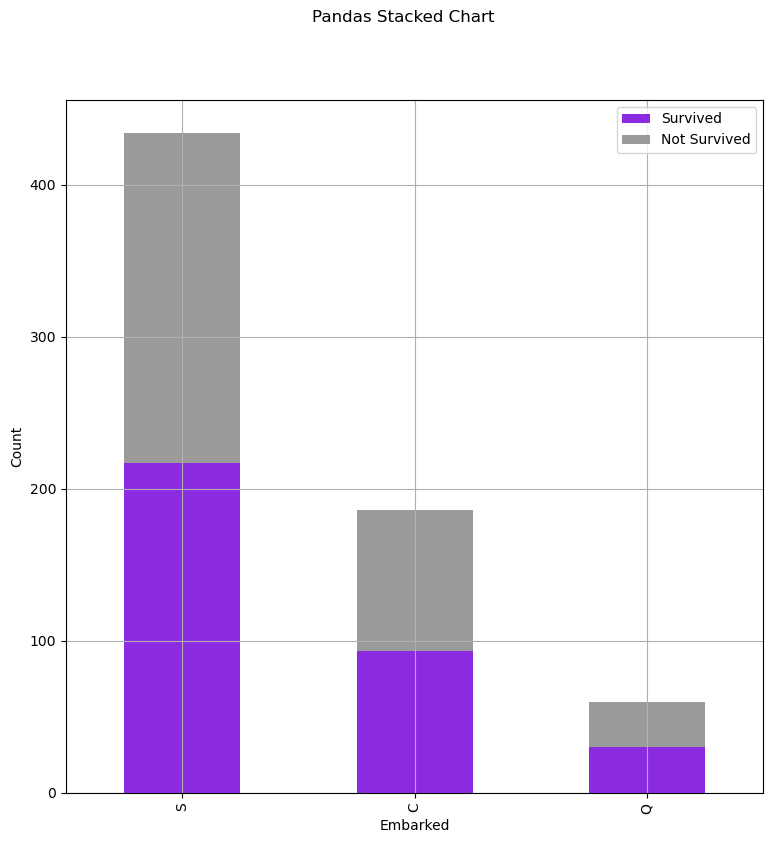

In [40]:
df_survived = df_titanic[df_titanic['Survived']==1]
df_not_survived = df_titanic[df_titanic['Survived']==0]

values = df_titanic['Embarked'].dropna().unique()
embarked_survived = df_survived['Embarked'].value_counts(dropna=True)
embarked_not_survived = df_survived['Embarked'].value_counts(dropna=True)

embarked_survived.name = 'Survived'
embarked_not_survived.name = 'Not Survived'
df = pd.concat([embarked_survived, embarked_not_survived], axis=1)

figure10,axes = plt.subplots(figsize=(9,9))
plt.xlabel('Embarked')
plt.ylabel('Count')
figure10.suptitle('Figure 10 - Pandas Stacked Chart')

df.plot.bar(stacked=True,grid=True, ax=axes, color=['#8A2BE2','#9b9a99'])

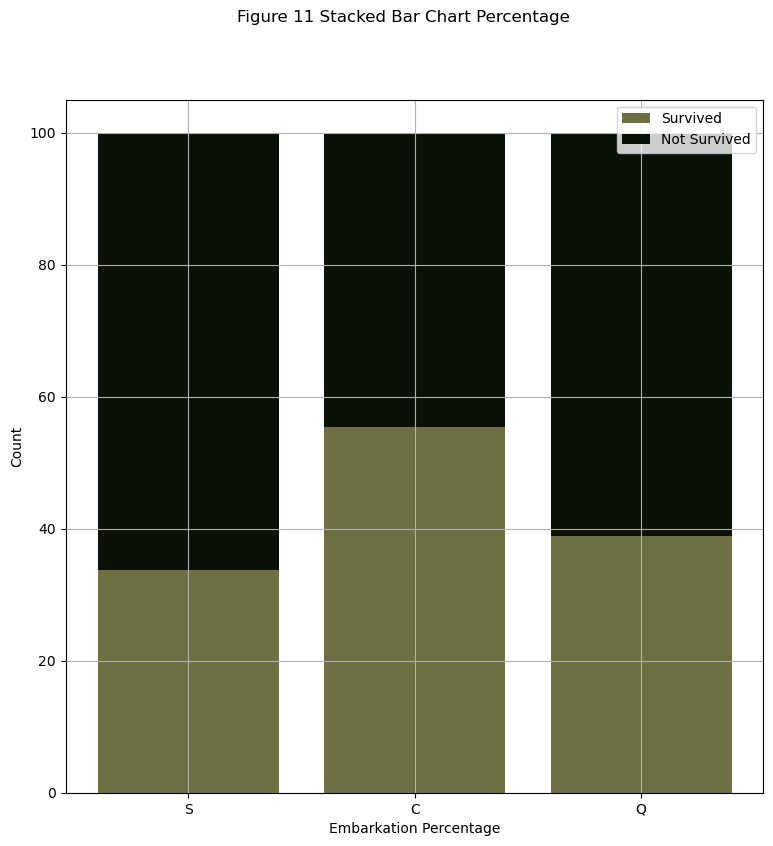

In [53]:
#Stacked Percentage Bar Chart
df_survived = df_titanic[df_titanic['Survived']==1]
df_not_survived = df_titanic[df_titanic['Survived']==0]

values = df_titanic['Embarked'].dropna().unique()
counts = df_titanic['Embarked'].value_counts(dropna=True)

embarked_survived = df_survived['Embarked'].value_counts(dropna=True)
embarked_not_survived = df_not_survived['Embarked'].value_counts(dropna=True)

embarked_survived_percent = embarked_survived/counts * 100
embarked_not_survived_percent = embarked_not_survived/counts * 100

x_positions = np.arange(len(values))

figure11, ax = plt.subplots(figsize=(9,9))
ax.set_xlabel('Embarkation Percentage')
ax.set_ylabel('Count')
ax.grid()
ax.set_xticks(x_positions, values)
figure11.suptitle('Figure 11 Stacked Bar Chart Percentage')

ax.bar(x_positions, embarked_survived_percent,color='#6f7041', label='Survived')
ax.bar(x_positions, embarked_not_survived_percent, color='#0b1107', label='Not Survived',bottom=embarked_survived_percent)

plt.legend()

Sex
male      100.0
female    100.0
Name: count, dtype: float64

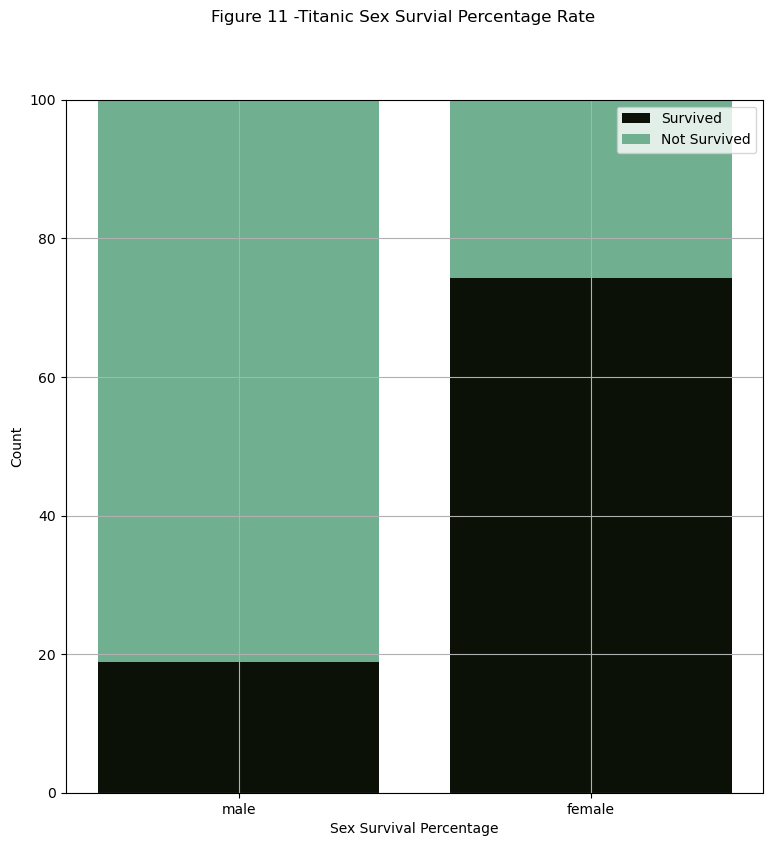

In [69]:
df_survival = df_titanic[df_titanic['Survived']==1]
df_not_survival = df_titanic[df_titanic['Survived']==0]


counts = df_titanic['Sex'].value_counts(dropna=True)

sex_survival = df_survival['Sex'].value_counts(dropna=True).reindex(counts.index, fill_value=0)
sex_not_survival = df_not_survival['Sex'].value_counts(dropna=True).reindex(counts.index, fill_value=0)

sex_survival_percentage = (sex_survival/counts) * 100
sex_not_survival_percentage = (sex_not_survival/counts) * 100

values = counts.index
x_positions = np.arange(len(values))

figure11, ax = plt.subplots(figsize=(9,9))
ax.set_xlabel('Sex Survival Percentage')
ax.set_ylabel('Count')
ax.grid()
#ax.set_ylim(0,100)
figure11.suptitle('Figure 11 -Titanic Sex Survial Percentage Rate')

ax.bar(x_positions, sex_survival_percentage, color='#0b1107', label='Survived')
ax.bar(x_positions, sex_not_survival_percentage,bottom=sex_survival_percentage, color='#70af90', label='Not Survived')
ax.set_xticks(x_positions, values)
ax.set_ylim(0,100)

plt.legend()
(sex_survival_percentage + sex_not_survival_percentage)

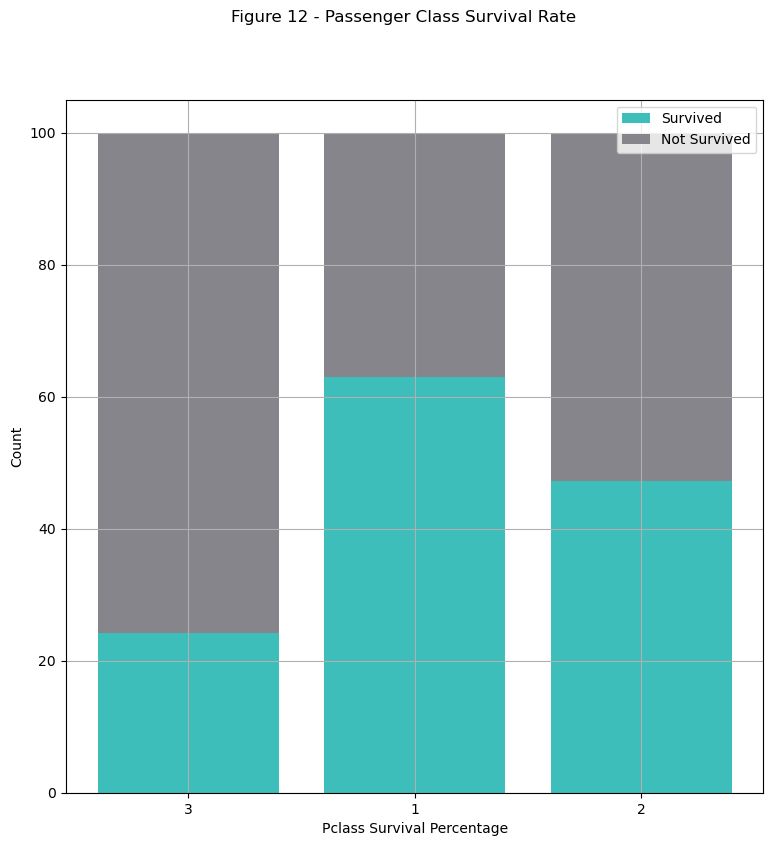

In [75]:
df_survived = df_titanic[df_titanic['Survived']==1]
df_not_survived = df_titanic[df_titanic['Survived']==0]

counts = df_titanic['Pclass'].value_counts(dropna=True)

df_pclass_survived = df_survived['Pclass'].value_counts(dropna=True).reindex(counts.index, fill_value=0)
df_pclass_not_survived = df_not_survived['Pclass'].value_counts(dropna=True).reindex(counts.index,fill_value=0)

df_pclass_survived_percentage = df_pclass_survived/counts *100
df_pclass_not_survived_percentage = df_pclass_not_survived/counts * 100

values = counts.index
x_positions = np.arange(len(values))

figure12, ax = plt.subplots(figsize=(9,9))
ax.grid()
ax.set_xlabel('Pclass Survival Percentage')
ax.set_ylabel('Count')
figure12.suptitle('Figure 12 - Passenger Class Survival Rate')
ax.set_xticks(x_positions, values)

ax.bar(x_positions, df_pclass_survived_percentage, color='#3ebeba', label='Survived')
ax.bar(x_positions, df_pclass_not_survived_percentage, bottom=df_pclass_survived_percentage, color='#86858c', label='Not Survived')
plt.legend()
#Ok, I think I'm starting to get this down!

<Axes: xlabel='Embarked', ylabel='% Survived'>

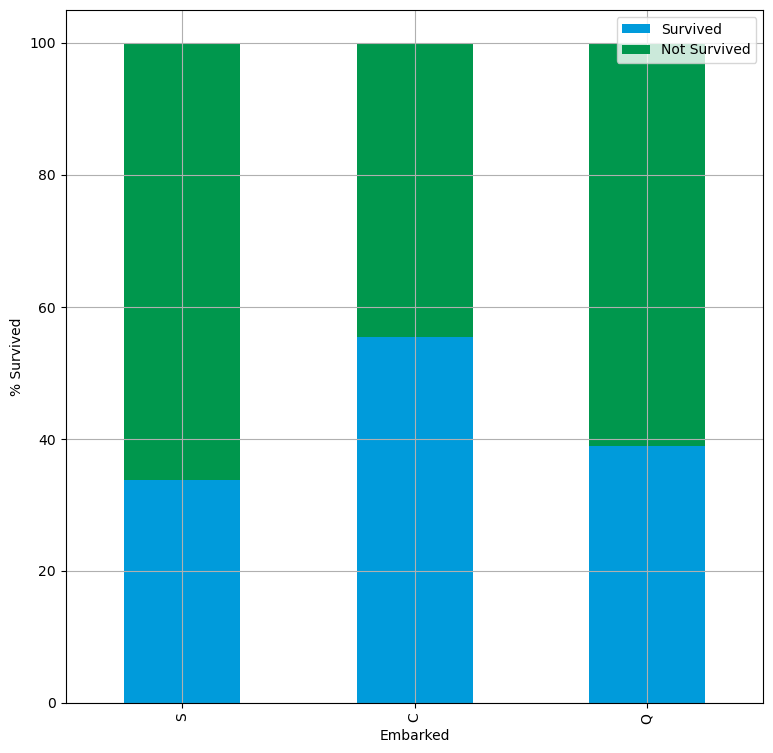

In [87]:
#Now lets do it using pandas
df_survived = df_titanic[df_titanic['Survived']==1]
df_not_survived = df_titanic[df_titanic['Survived']==0]

values = counts.index
counts = df_titanic['Embarked'].value_counts(dropna=True)

embarked_survived = df_survived['Embarked'].value_counts(dropna=True).reindex(counts.index, fill_value=0)
embarked_not_survived = df_not_survived['Embarked'].value_counts(dropna=True).reindex(counts.index, fill_value=0)

embarked_survived_percentage = embarked_survived / counts * 100
embarked_not_survived_percentage = embarked_not_survived / counts * 100

embarked_survived_percentage.name = "Survived"
embarked_not_survived_percentage.name = "Not Survived"

df = pd.concat([embarked_survived_percentage,embarked_not_survived_percentage], axis=1)

figure13, ax = plt.subplots(figsize=(9,9))
plt.xlabel('Embarkation Point')
plt.ylabel('% Survived')

df.plot.bar(stacked=True, ax=ax, grid=True, color=['#009bdb','#00974d'])

Sex
male      100.0
female    100.0
dtype: float64

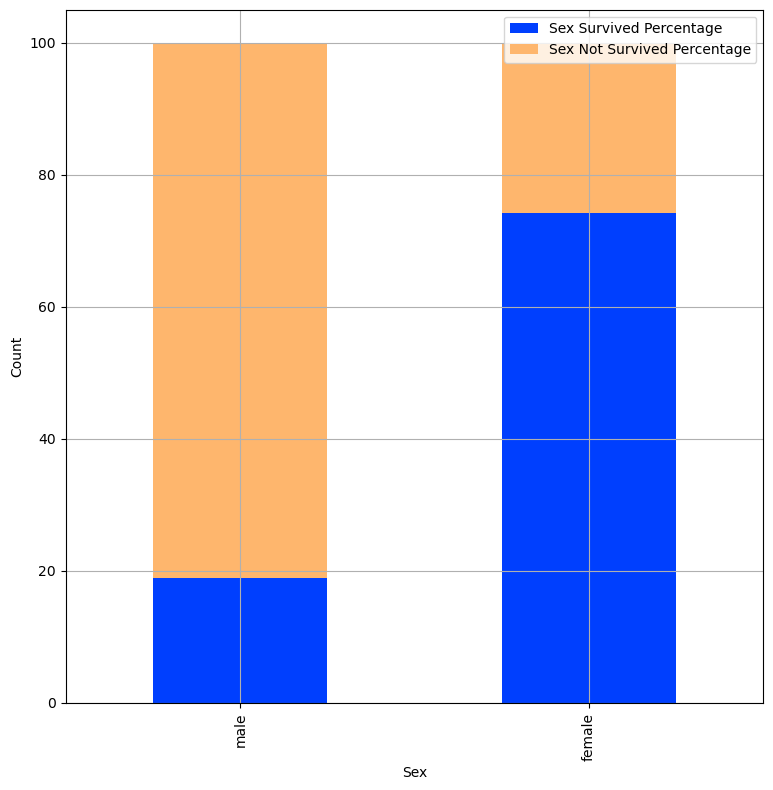

In [95]:
df_survived = df_titanic[df_titanic['Survived']==1]
df_not_survived = df_titanic[df_titanic['Survived']==0]

value = counts.index
counts = df_titanic['Sex'].value_counts(dropna=True)


sex_survived = df_survived['Sex'].value_counts(dropna=True).reindex(counts.index, fill_value=0)
sex_not_survived = df_not_survived['Sex'].value_counts(dropna=True).reindex(counts.index, fill_value=0)

sex_survived_percentage = sex_survived / counts * 100
sex_not_survived_percentage = sex_not_survived / counts * 100

value = counts.index

sex_survived_percentage.name = "Sex Survived Percentage"
sex_not_survived_percentage.name = "Sex Not Survived Percentage"

df = pd.concat([sex_survived_percentage,sex_not_survived_percentage], axis=1)

fig, ax = plt.subplots(figsize=(9,9))
plt.xlabel('% Sex Survived')
plt.ylabel('Count')

df.plot.bar(stacked=True, grid=True, ax=ax, color=['#003ffe','#feb66d'])
(sex_survived_percentage + sex_not_survived_percentage) 

Pclass
3    100.0
1    100.0
2    100.0
Name: count, dtype: float64

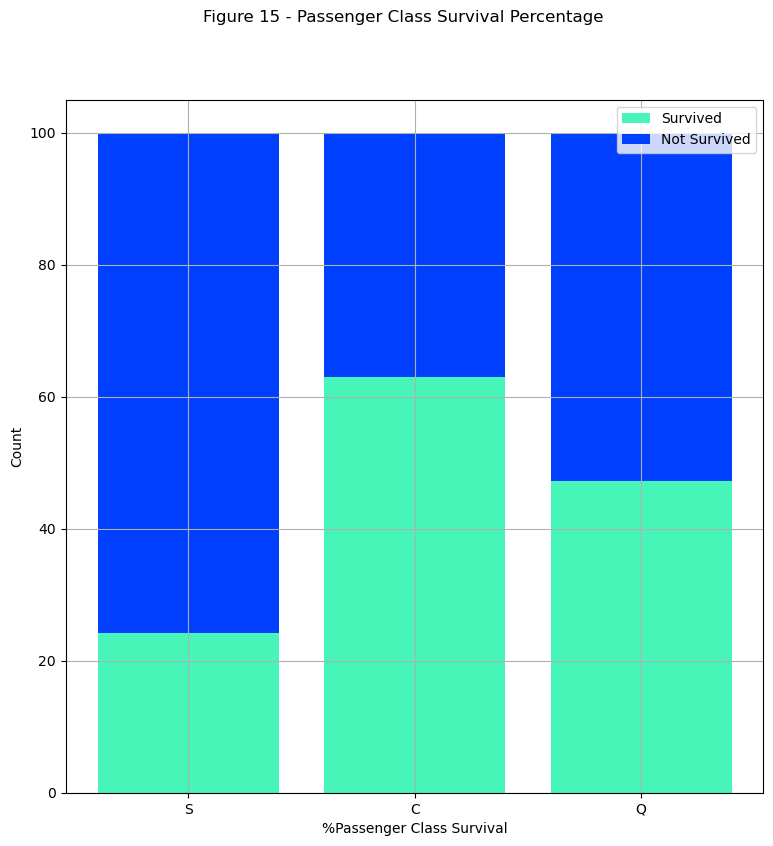

In [99]:
df_survived = df_titanic[df_titanic['Survived']==1]
df_not_survived = df_titanic[df_titanic['Survived']==0]

counts = df_titanic['Pclass'].value_counts(dropna=True)
value = counts.index

pclass_survived = df_survived['Pclass'].value_counts(dropna=True).reindex(counts.index,fill_value=0)
pclass_not_survived = df_not_survived['Pclass'].value_counts(dropna=True).reindex(counts.index,fill_value=0)

pclass_survived_percentage = pclass_survived/counts * 100
pclass_not_survived_percentage = pclass_not_survived/counts * 100

x_positions = np.arange(len(values))

figure15, ax = plt.subplots(figsize=(9,9))
ax.grid()
ax.set_xlabel('%Passenger Class Survival')
ax.set_ylabel('Count')
ax.set_xticks(x_positions,values)
figure15.suptitle('Figure 15 - Passenger Class Survival Percentage')

ax.bar(x_positions, pclass_survived_percentage, color='#48f5b9', label='Survived')
ax.bar(x_positions, pclass_not_survived_percentage, bottom=pclass_survived_percentage, color='#003ffe', label='Not Survived')
plt.legend()
(pclass_survived_percentage + pclass_not_survived_percentage)

Pclass
3    100.0
1    100.0
2    100.0
dtype: float64

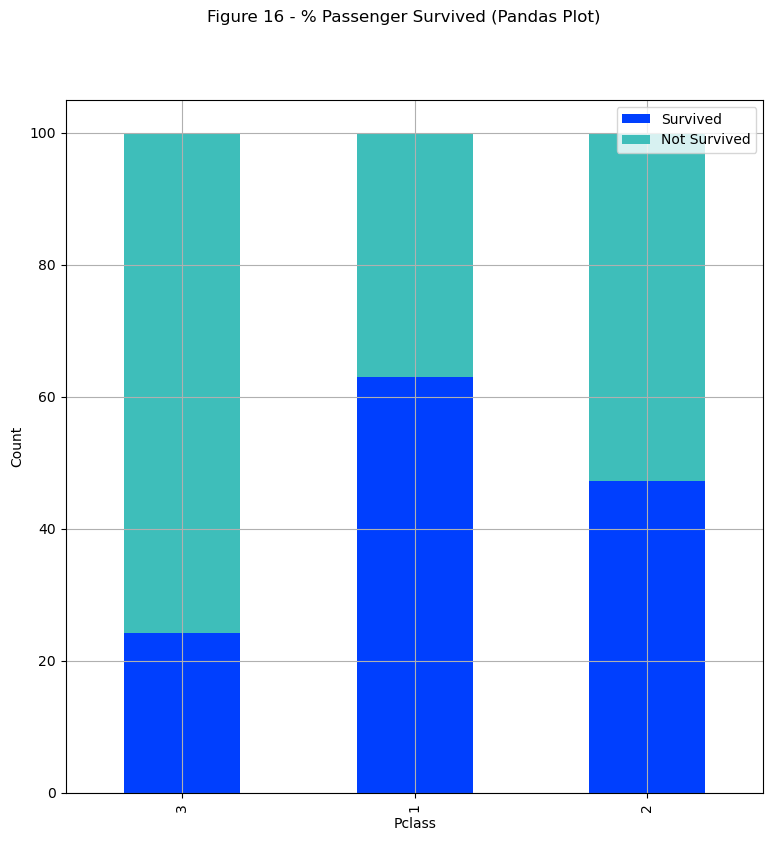

In [105]:
df_survived = df_titanic[df_titanic['Survived']==1]
df_not_survived = df_titanic[df_titanic['Survived']==0]

counts = df_titanic['Pclass'].value_counts(dropna=True)
values = counts.index

pclass_survived = df_survived['Pclass'].value_counts(dropna=True).reindex(counts.index,fill_value=0)
pclass_not_survived = df_not_survived['Pclass'].value_counts(dropna=True).reindex(counts.index,fill_value=0)

pclass_survived_percentage = pclass_survived/counts * 100
pclass_not_survived_percentage = pclass_not_survived/counts * 100

pclass_survived_percentage.name='Survived'
pclass_not_survived_percentage.name='Not Survived'

figure16, ax = plt.subplots(figsize=(9,9))
plt.xlabel('% Passengers Survived')
plt.ylabel('Count')
figure16.suptitle('Figure 16 - % Passenger Survived (Pandas Plot)')

df = pd.concat([pclass_survived_percentage,pclass_not_survived_percentage], axis=1)
df.plot.bar(stacked=True, grid=True, ax=ax, color=['#003ffe','#3ebeba'])
(pclass_survived_percentage + pclass_not_survived_percentage)

C:\Users\deanc\AppData\Local\Temp\ipykernel_14348\529992565.py:22: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.plot.pie(stacked=True, grid=True, subplots=True,ax=ax, color=['#003ffe','#3ebeba'])


Pclass
3    100.0
1    100.0
2    100.0
dtype: float64

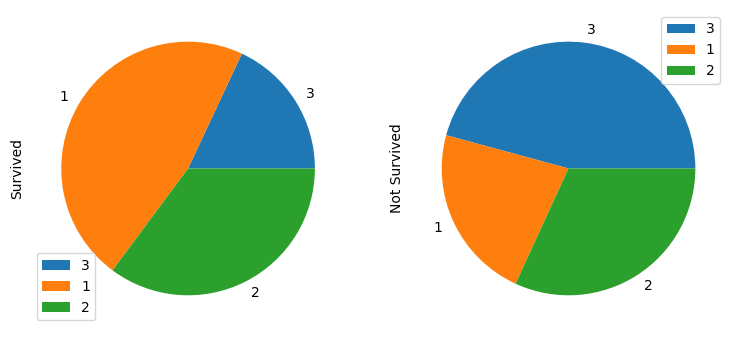

In [107]:
#First try at pie chart
df_survived = df_titanic[df_titanic['Survived']==1]
df_not_survived = df_titanic[df_titanic['Survived']==0]

counts = df_titanic['Pclass'].value_counts(dropna=True)
values = counts.index

pclass_survived = df_survived['Pclass'].value_counts(dropna=True).reindex(counts.index,fill_value=0)
pclass_not_survived = df_not_survived['Pclass'].value_counts(dropna=True).reindex(counts.index,fill_value=0)

pclass_survived_percentage = pclass_survived/counts * 100
pclass_not_survived_percentage = pclass_not_survived/counts * 100

pclass_survived_percentage.name='Survived'
pclass_not_survived_percentage.name='Not Survived'

figure17, ax = plt.subplots(figsize=(9,9))
plt.xlabel('% Passengers Survived')
plt.ylabel('Count')
figure16.suptitle('Figure 16 - % Passenger Survived (Pandas Plot)')

df = pd.concat([pclass_survived_percentage,pclass_not_survived_percentage], axis=1)
df.plot.pie(stacked=True, grid=True, subplots=True,ax=ax, color=['#003ffe','#3ebeba'])
(pclass_survived_percentage + pclass_not_survived_percentage)

889
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: count, dtype: float64


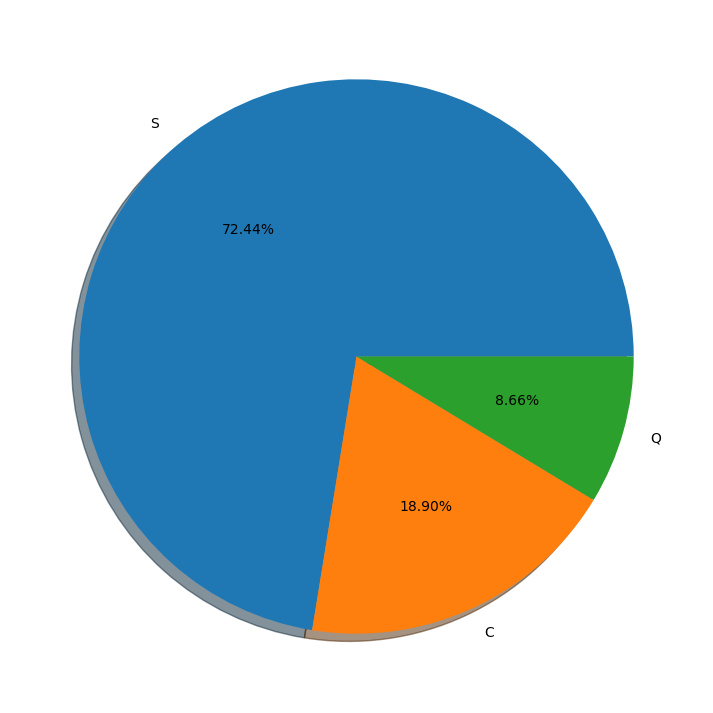

In [119]:
#Pie charts are used to plot categorical attributes
fig18 = plt.figure(figsize=(9,9))

embarkation_ports = df_titanic['Embarked'].dropna().unique()
counts = df_titanic['Embarked'].value_counts(dropna=True)

total_embarked = counts.sum()
counts_percentage = counts / total_embarked * 100

counts_percentage.values

plt.pie(counts_percentage.values,labels=embarkation_ports, autopct='%1.2f%%', shadow=True, startangle=0)

print(total_embarked)
print(counts)
print(counts_percentage)

891
Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


([<matplotlib.patches.Wedge at 0x299531a3b10>,
 [Text(-0.6951120375624736, 0.8525369524165779, '3'),
  Text(0.03877714873635525, -1.0993163024061268, '1'),
  Text(1.0913940963131585, -0.13732780684473234, '2')],
 [Text(-0.37915202048862195, 0.4650201558635879, '55.1%'),
  Text(0.021151172038011954, -0.5996270740397054, '24.2%'),
  Text(0.5953058707162683, -0.07490607646076308, '20.7%')])

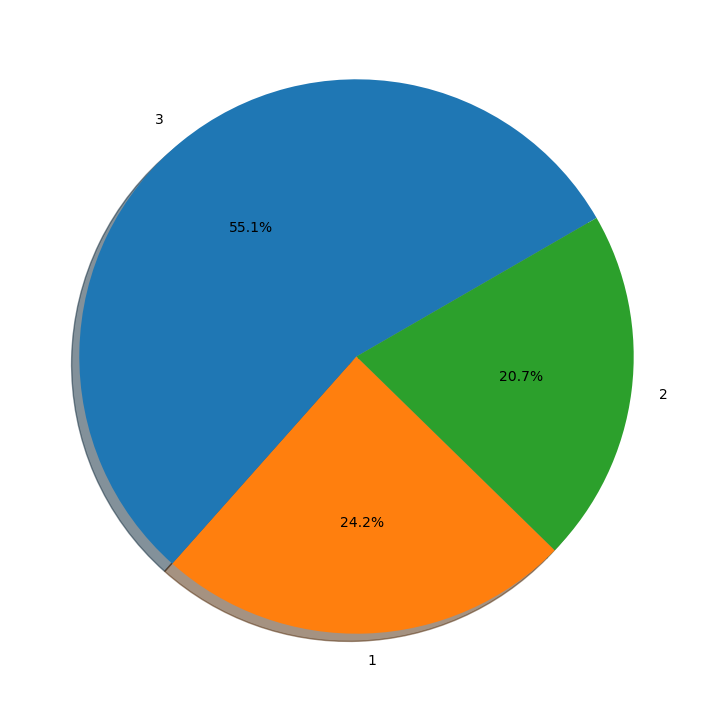

In [137]:
fig19 = plt.subplots(figsize=(9,9))

pclass = df_titanic['Pclass'].dropna().unique()
counts = df_titanic['Pclass'].value_counts(dropna=True)

pclass_total = counts.values.sum()
pclass_percentage = counts/pclass_total * 100

print(pclass_total)
print(pclass_percentage)

pclass_percentage.values
plt.pie(pclass_percentage.values, labels=pclass, autopct='%1.1f%%', shadow=True, startangle=30)

Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: count, dtype: float64


([<matplotlib.patches.Wedge at 0x2995299e0d0>,
 [Text(-0.8377704896039081, -0.7128398184366725, 'S'),
  Text(0.9985295659561383, 0.46145282089445105, 'C'),
  Text(0.2956369278692323, 1.059527633844461, 'Q')],
 [Text(-0.4569657216021316, -0.38882171914727587, '72.44%'),
  Text(0.5446524905215299, 0.2517015386697005, '18.90%'),
  Text(0.1612565061104903, 0.5779241639151605, '8.66%')])

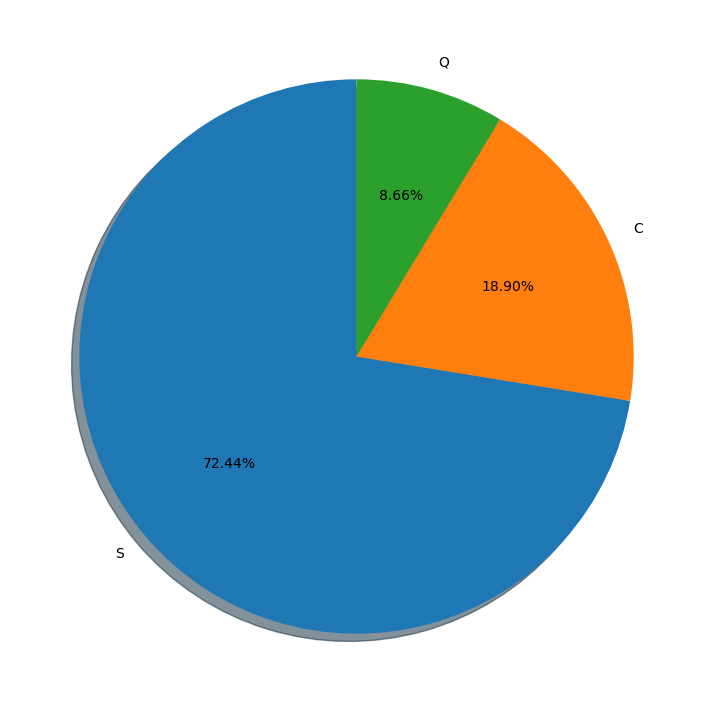

In [152]:
fig20 = plt.subplots(figsize=(9,9))

ports_embarked = df_titanic['Embarked'].dropna().unique() #What your categories are
counts = df_titanic['Embarked'].value_counts(dropna=True) #Count the number of items in each category

ports_embarked_total = counts.values.sum() #Add the number of items in all categories together

ports_embarked_percentage = counts/ports_embarked_total * 100
print(ports_embarked_percentage)

ports_embarked_percentage.values

plt.pie(ports_embarked_percentage.values, labels=ports_embarked, shadow=True, autopct='%1.2f%%', startangle=90)
#Repeat this on a new sheet

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


([<matplotlib.patches.Wedge at 0x29952ebfed0>,
 [Text(-0.9838645916122588, -0.49194559188150416, 'male'),
  Text(0.9838645486050037, 0.49194567789368, 'female')],
 [Text(-0.5366534136066865, -0.26833395920809316, '64.76%'),
  Text(0.5366533901481838, 0.2683340061238254, '35.24%')])

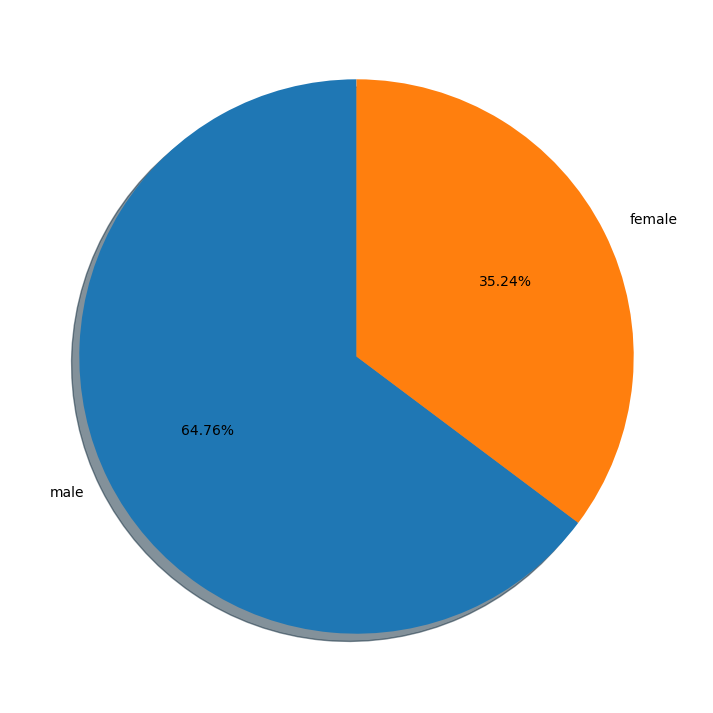

In [157]:
fig21 = plt.subplots(figsize=(9,9))

passenger_sex = df_titanic['Sex'].dropna().unique() #Identifying the categories
counts = df_titanic['Sex'].value_counts(dropna=True) #Counting the items in each category

total_passenger_sex = counts.values.sum()

passenger_sex_percentage = counts/total_passenger_sex * 100 
print(passenger_sex_percentage)

passenger_sex_percentage.values

plt.pie(passenger_sex_percentage.values,labels=passenger_sex, shadow=True, autopct='%1.2f%%', startangle=90)

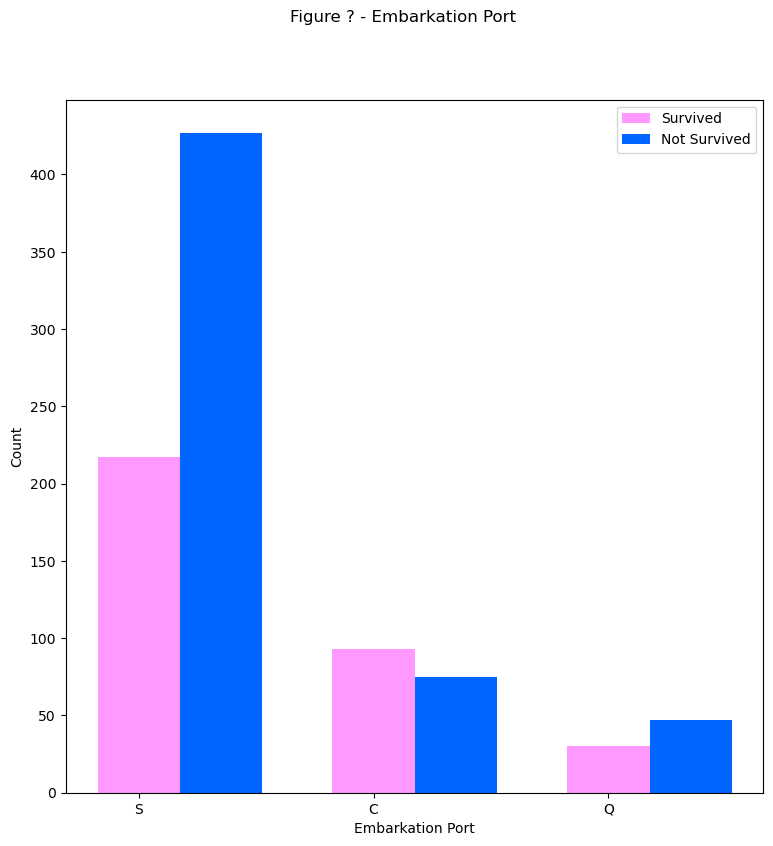

In [161]:
df_survived = df_titanic[df_titanic['Survived']==1]
df_not_survived = df_titanic[df_titanic['Survived']==0]

counts = df_titanic['Embarked'].value_counts(dropna=True)
values= counts.index

embarked_survived = df_survived['Embarked'].value_counts(dropna=True).reindex(counts.index, fill_value=0)
embarked_not_survived = df_not_survived['Embarked'].value_counts(dropna=True).reindex(counts.index, fill_value=0)

x_positions = np.arange(len(values))
bar_width = 0.35

fig22, ax = plt.subplots(figsize=(9,9))
ax.set_xlabel('Embarkation Port')
ax.set_ylabel('Count')
fig22.suptitle('Figure 22 - Embarkation Port')
ax.set_xticks(x_positions,values)

ax.bar(x_positions,embarked_survived,bar_width,label='Survived', color='#ff99ff')
ax.bar(x_positions + bar_width,embarked_not_survived,bar_width,label='Not Survived',color='#0066ff')

plt.legend()


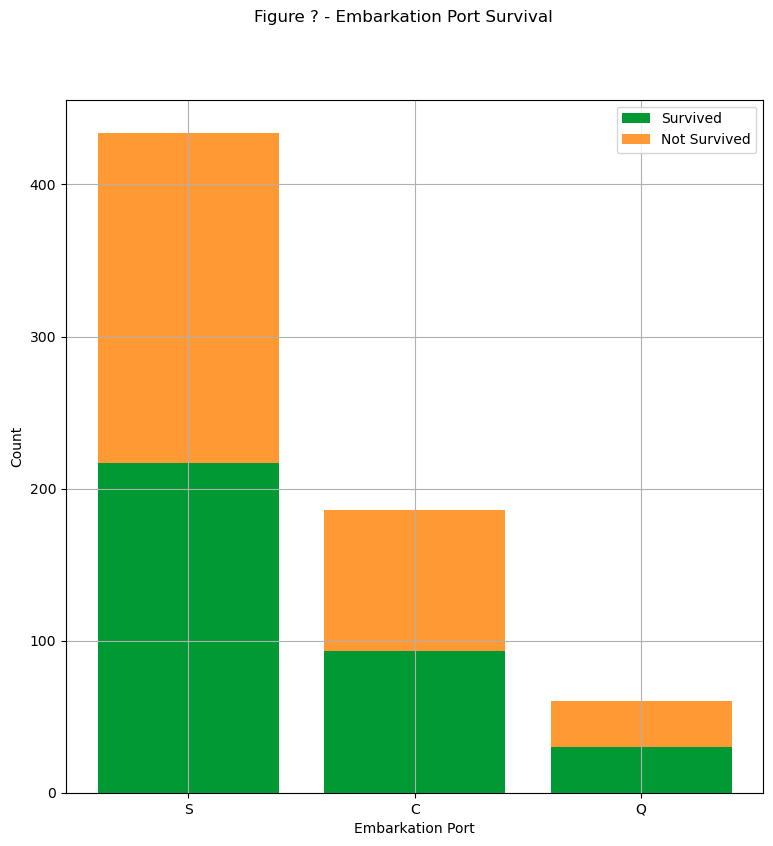

In [164]:
df_survived = df_titanic[df_titanic['Survived']==1]
df_not_survived = df_titanic[df_titanic['Survived']==0]

embarked_survived = df_survived['Embarked'].value_counts(dropna=True).reindex(counts.index, fill_value=0)
embarked_not_survived = df_survived['Embarked'].value_counts(dropna=True).reindex(counts.index, fill_value=0)

counts = df_titanic['Embarked'].value_counts(dropna=True)
values = counts.index

x_positions = np.arange(len(values))

fig23,ax = plt.subplots(figsize=(9,9))
ax.set_xlabel('Embarkation Port')
ax.set_ylabel('Count')
ax.grid()
fig23.suptitle('Figure 23 - Embarkation Port Survival')
ax.set_xticks(x_positions,values)

ax.bar(x_positions, embarked_survived, label='Survived', color='#009933')
ax.bar(x_positions, embarked_not_survived, bottom=embarked_survived, label='Not Survived', color='#ff9933')

plt.legend()
#This value shouldn't added to 100 which is the whole purpose of creating a % chart to get a better view of what's happending with the data

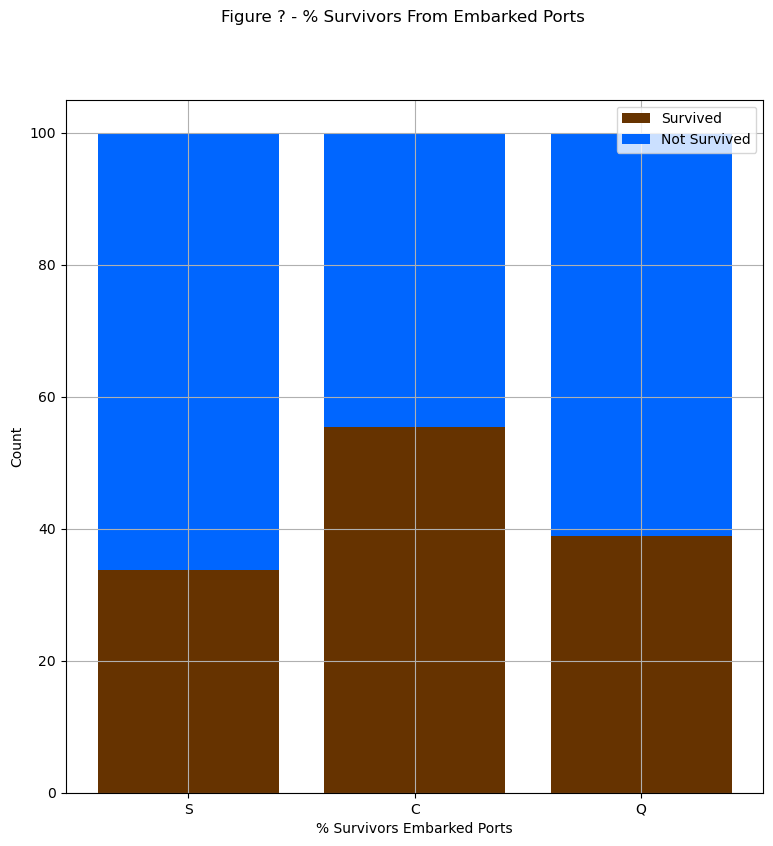

In [168]:
df_survived = df_titanic[df_titanic['Survived']==1]
df_not_survived = df_titanic[df_titanic['Survived']==0]

embarked_survived = df_survived['Embarked'].value_counts(dropna=True).reindex(counts.index, fill_value=0)
embarked_not_survived = df_not_survived['Embarked'].value_counts(dropna=True).reindex(counts.index, fill_value=0)

counts = df_titanic['Embarked'].value_counts(dropna=True)
values = counts.index

embarked_survived_percentage = embarked_survived/counts * 100
embarked_not_survived_percentage = embarked_not_survived/counts * 100

x_positions = np.arange(len(values))

fig24, ax = plt.subplots(figsize=(9,9))
ax.set_xlabel('% Survivors Embarked Ports')
ax.set_ylabel('Count')
ax.grid()
ax.set_xticks(x_positions, values)
fig.suptitle('Figure 24 - % Survivors From Embarked Ports')

ax.bar(x_positions, embarked_survived_percentage, label='Survived', color='#663300')
ax.bar(x_positions, embarked_not_survived_percentage, bottom= embarked_survived_percentage, label='Not Survived', color='#0066ff')
plt.legend()

<Axes: ylabel='count'>

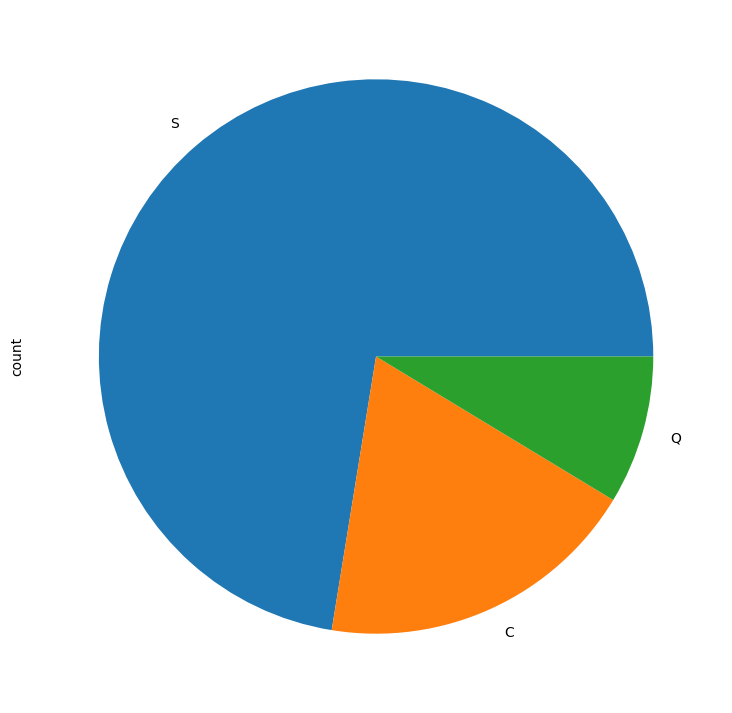

In [169]:
fig25 = plt.subplots(figsize=(9,9))

df_titanic['Embarked'].value_counts(dropna=True).plot.pie()

([<matplotlib.patches.Wedge at 0x29d2c824910>,
 [Text(-0.23995713699596616, -1.073508533922623, 'Survived'),
  Text(0.23995729909124236, 1.073508497690091, 'Not Survived')],
 [Text(-0.1308857110887088, -0.5855501094123396, '93.00%'),
  Text(0.130885799504314, 0.5855500896491405, '7.00%')])

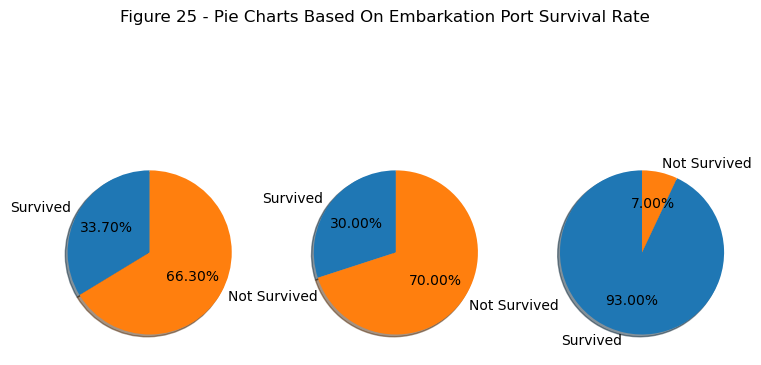

In [9]:
#Create three pie showing the proportion of survivors from each embarkation point
s_df = df_titanic[df_titanic['Embarked']=='S']
q_df = df_titanic[df_titanic['Embarked']=='Q']
c_df = df_titanic[df_titanic['Embarked']=='C']

s_survived = s_df[s_df['Survived']==1].Embarked.count()
q_survived = q_df[q_df['Survived']==1].Embarked.count()
c_survived = c_df[c_df['Survived']==1].Embarked.count()

wedge_label = ['Survived', 'Not Survived']

s_embarked_total = s_df['Embarked'].count()
s_not_survived = s_embarked_total - s_survived
s_survived_percentage = s_survived/s_embarked_total * 100
s_not_survived_percentage = s_not_survived/s_embarked_total * 100
s_wedge_group = [s_survived_percentage, s_not_survived_percentage]

q_embarked_total = q_df['Embarked'].count()
q_not_survived = 100 - q_survived
q_survived_percentage = q_survived/q_embarked_total * 100
q_not_survived_percentage = q_not_survived/q_embarked_total * 100
q_wedge_group = [q_survived_percentage, q_not_survived_percentage]


c_embarked_total = c_df['Embarked'].count()
c_not_survived = 100- c_survived
c_survived_percentage = c_survived/ c_embarked_total * 100
c_not_survived_percentage = c_not_survived/ c_embarked_total * 100
c_wedge_group = [c_survived_percentage, c_not_survived_percentage]

figure25,ax = plt.subplots(1,3,figsize=(9,5))
figure25.suptitle('Figure 25 - Pie Charts Based On Embarkation Port Survival Rate')
ax[0].pie(s_wedge_group, labels=wedge_label, autopct='%1.2f%%', shadow=True, startangle=90)
ax[1].pie(q_wedge_group, labels=wedge_label, autopct='%1.2f%%', shadow=True, startangle=90)
ax[2].pie(c_wedge_group, labels=wedge_label, autopct='%1.2f%%', shadow=True, startangle=90)

array([<Axes: ylabel='S'>, <Axes: ylabel='C'>, <Axes: ylabel='Q'>],
      dtype=object)

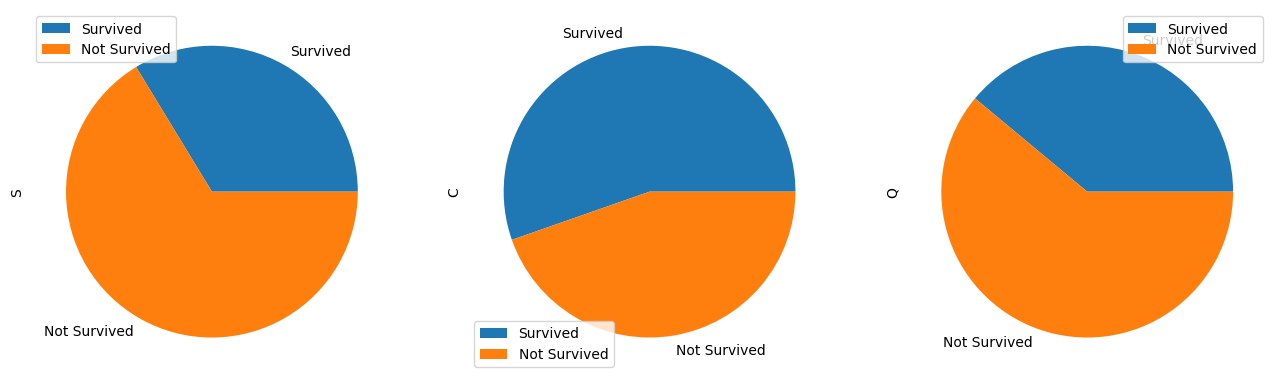

In [17]:
df_survived = df_titanic[df_titanic['Survived']==1]
df_not_survived = df_titanic[df_titanic['Survived']==0]

counts = df_titanic['Embarked'].value_counts(dropna=True)
values = counts.index

embarked_survived = df_survived['Embarked'].value_counts(dropna=True).reindex(counts.index,fill_value=0)
embarked_not_survived = df_not_survived['Embarked'].value_counts(dropna=True).reindex(counts.index,fill_value=0)

embarked_survived_percentage = embarked_survived/counts * 100
embarked_not_survived_percentage = embarked_not_survived/counts * 100

embarked_survived_percentage.name='Survived'
embarked_not_survived_percentage.name = 'Not Survived'

df = pd.concat([embarked_survived_percentage,embarked_not_survived_percentage],axis=1) #I forgot the parenthesis around the 'concat' function
df.T.plot.pie(sharex=True, subplots=True, figsize=(16,7)) #Study this line some more

Box Plots are essential to view the distribution acrooss the numerical attribute!
Extremely useful when trying to compare the distribution of different numerical attributes.
Q1 = any # less than 25%
Q2 = any # less than 50%
Q3 = any # less than 75%
Minimum is calculated using Q1 - 1.5 * IQR
Maximum is calculated using Q3 + 1.5 * 1QR

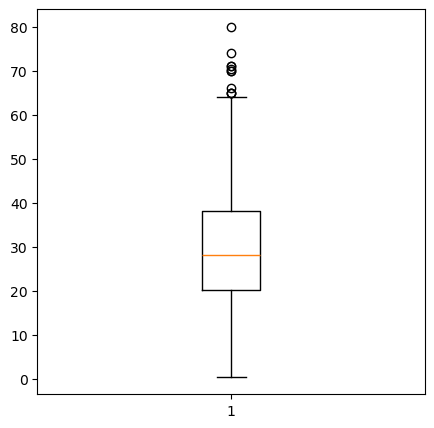

In [5]:
figure,ax=plt.subplots(1,2,figsize=(5,5))

box_plot = plt.boxplot(df_titanic['Age'].dropna())

<Axes: >

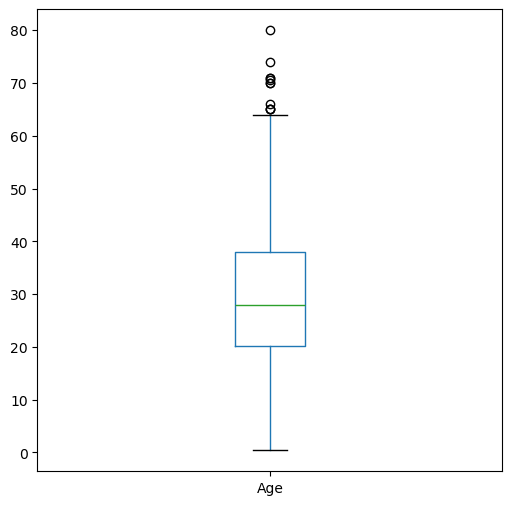

In [7]:
df_titanic.boxplot(column='Age', grid=False, figsize=(6,6))

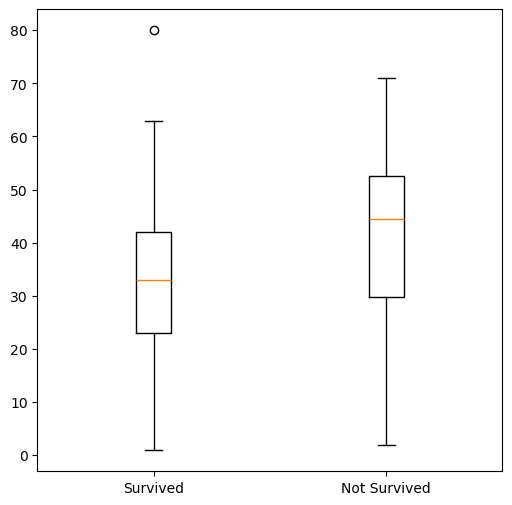

In [11]:
df_survived = df_titanic[df_titanic['Survived']==1].dropna()
df_not_survived = df_titanic[df_titanic['Survived']==0].dropna()

fig, ax = plt.subplots(figsize=(6,6))
box_plot = plt.boxplot([df_survived['Age'], df_not_survived['Age']], tick_labels=['Survived','Not Survived'])

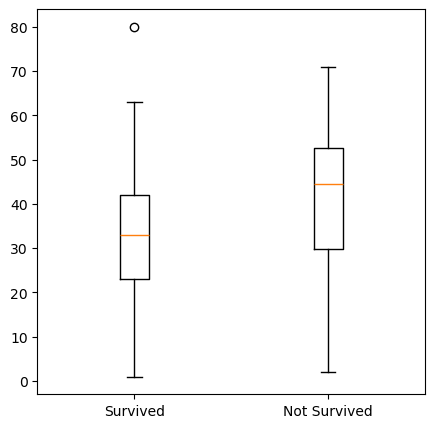

In [13]:
df_survived = df_titanic[df_titanic['Survived']==1].dropna()
df_not_survived = df_titanic[df_titanic['Survived']==0].dropna()

fig, ax = plt.subplots(figsize=(5,5))
age_boxplot = plt.boxplot([df_survived['Age'],df_not_survived['Age']], tick_labels=['Survived','Not Survived'])

<Axes: title={'center': 'Age'}, xlabel='Survived'>

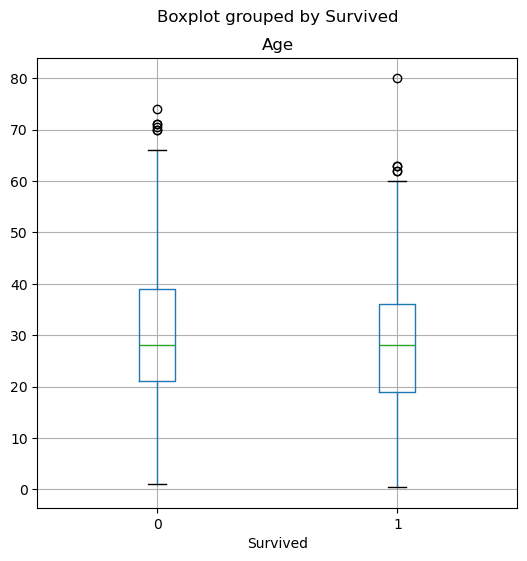

In [14]:
df_titanic.boxplot(column='Age', by = 'Survived', figsize=(6,6), grid=True)

<Axes: title={'center': 'Fare'}, xlabel='Survived'>

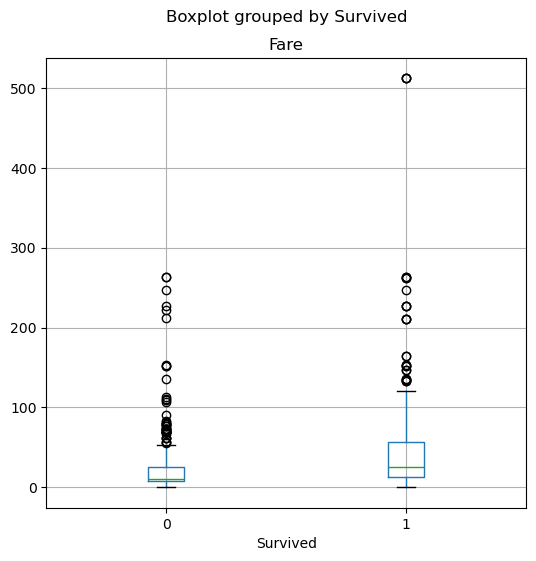

In [22]:
df_titanic.boxplot(column='Fare', by='Survived', figsize=(6,6), grid=True) #Sex would never work because its categorical. 
#Boxplots work with numerical values! 

In [21]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Don't forget:
Bar charts, stacked bar charts, stacked bar percentage charts, and pie charts are used to analyze categorical information.
Box plots, and scatter plots are used to analyze numerical information!

Scatter Plots - One attribute on the x-axis and another on the y-axis, of course... 

32.204207968574636
28.0


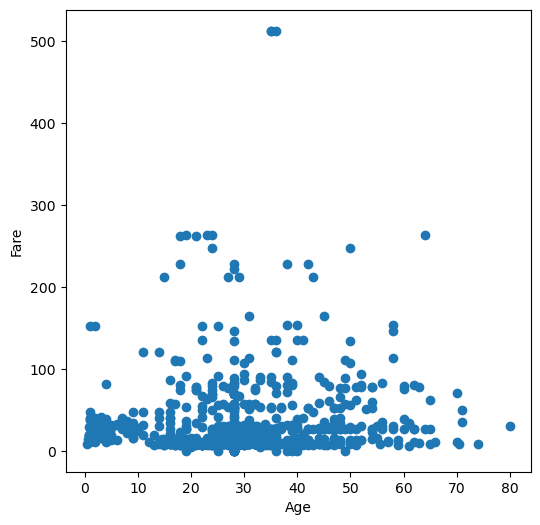

In [11]:
#Lets create a scatter plot of age vs fare
#First we have to fix the attributes by filling the missing values that we don't have.
#Fill missing Age values with MEDIAN values - True center of ages aboard the ship 
#Fill missing Fare values with MEAN values - The average price paid

mean_fare = df_titanic['Fare'].mean()
df_titanic['Fare'].fillna(mean_fare)
print(mean_fare)

median_age = df_titanic['Age'].median()
df_titanic['Age'].fillna(median_age)
print(median_age)

fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel('Age')
ax.set_ylabel('Fare')

plt.scatter(df_titanic['Age'],df_titanic['Fare'])

<Axes: xlabel='Age', ylabel='Fare'>

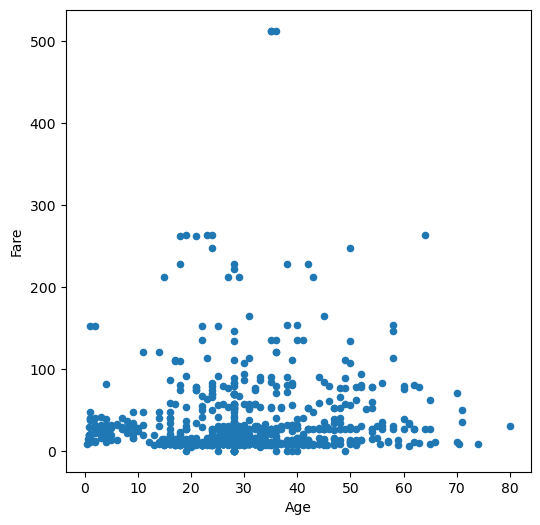

In [10]:
df_titanic.plot.scatter(x='Age', y='Fare', figsize=(6,6))

<Axes: xlabel='Age', ylabel='Fare'>

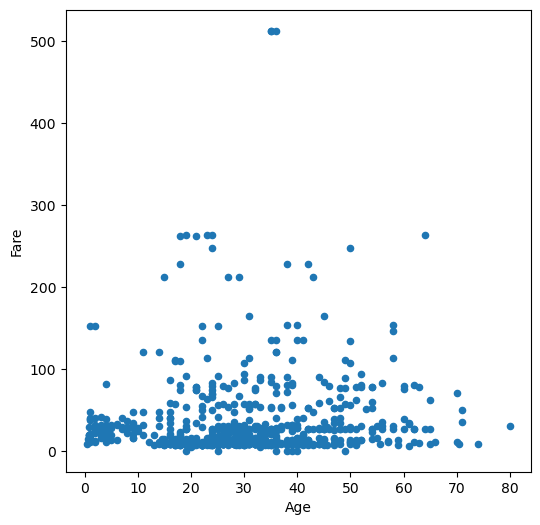

In [4]:
df_titanic.plot.scatter(x='Age', y='Fare',figsize=(6,6))

32.204207968574636
28.0


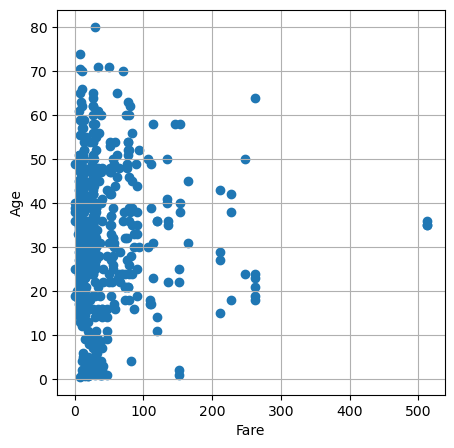

In [7]:
mean_fare = df_titanic['Fare'].mean()
df_titanic['Fare'].fillna(mean_fare)
print(mean_fare)

median_age = df_titanic['Age'].median()
df_titanic['Fare'].fillna(median_age)
print(median_age)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid()
ax.set_xlabel('Fare')
ax.set_ylabel('Age')

plt.scatter(df_titanic['Fare'], df_titanic['Age'])

Later tonight, recreate all of the different charts that I've mastered (bar charts, stacked bar charts, stacked bar percentage charts, pie charts). 

Create a funciton that can be used to generate a scatter plot matrix! Function takes three arguments. 

In [4]:
def generate_scatterplot_matrix(df_input, size_h, size_w):
    num_points, num_attributes = df_input.shape

    fig, axes = plt.subplots(num_attributes, num_attributes, figsize=(size_w, size_h))

    column_names = df_input.columns.values

    for x in range(num_attributes):
        for y in range(num_attributes):
            ax = axes[x, y]

            ax.scatter(df_input.iloc[:, x], df_input.iloc[:, y])

            # Hide ticks by default
            #ax.xaxis.set_visible(False)
            #ax.yaxis.set_visible(False)

            # First column
            if y == 0:
                ax.yaxis.set_ticks_position('left')
                ax.yaxis.set_visible(True)
                ax.set_ylabel(column_names[x])

            # Last column
            if y == num_attributes - 1:
                ax.yaxis.set_ticks_position('right')
                ax.yaxis.set_visible(True)

            # First row
            if x == 0:
                ax.xaxis.set_ticks_position('top')
                ax.xaxis.set_visible(True)

            # Last row
            if x == num_attributes - 1:
                ax.xaxis.set_ticks_position('bottom')
                ax.xaxis.set_visible(True)
                ax.set_xlabel(column_names[y])

    return fig, axes
            

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


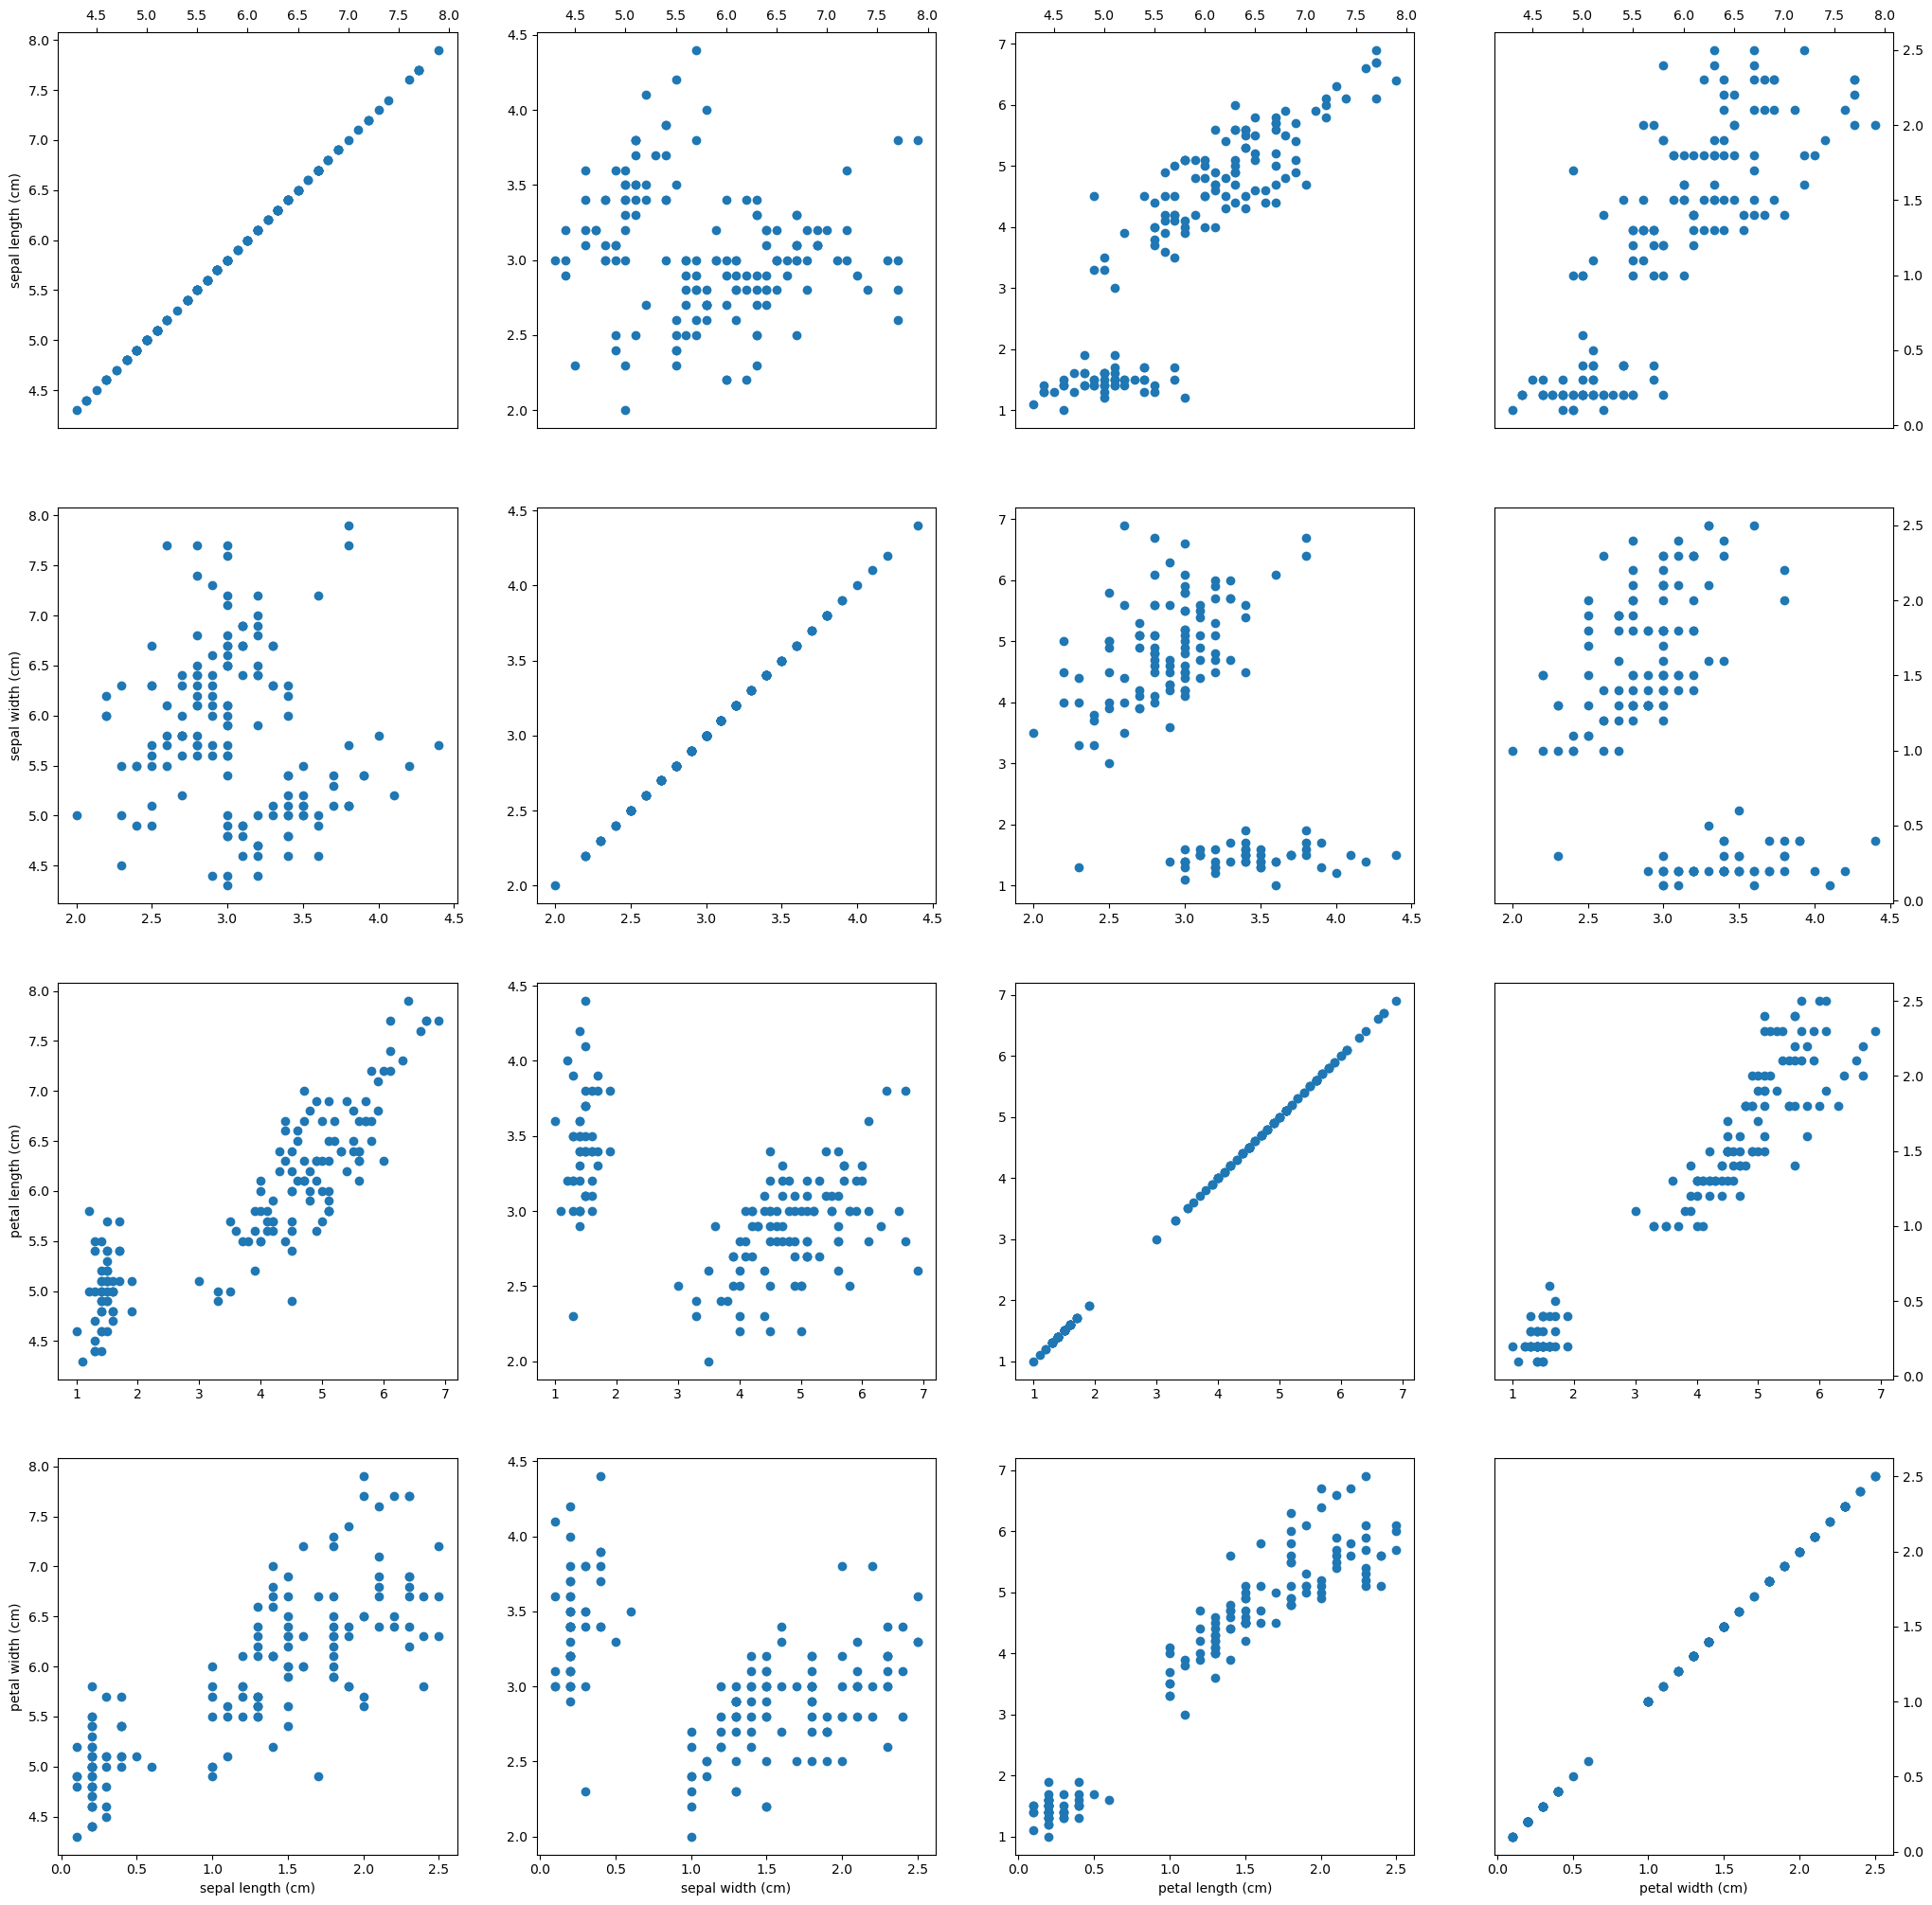

In [5]:
import sklearn
iris = sklearn.datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
generate_scatterplot_matrix(df_iris, 25,25)
df_iris.head()

In [ ]:
# 1. Get number of columns
# 2. Create subplot grid
# 3. Loop through rows
# 4. Loop through columns
# 5. Plot scatter
# 6. Hide ticks
# 7. Show edge labels


array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

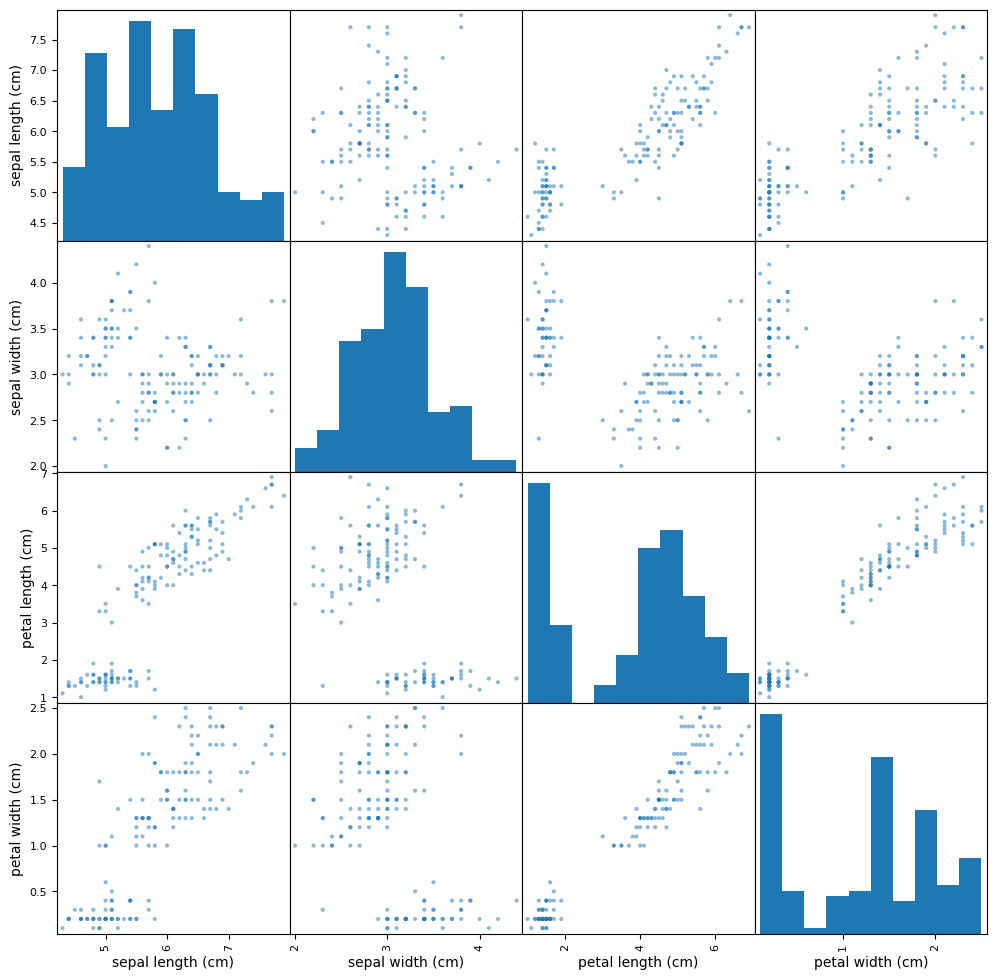

In [39]:
#Matplotlib doesnt have a built in scatter plot matrix
import sklearn.datasets
import pandas.plotting

iris = sklearn.datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

pandas.plotting.scatter_matrix(df_iris, figsize=(12,12))